In [10]:
import numpy as np
import seaborn as sns
import scipy as sp
import functools
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal
import scipy.stats as stats
import time

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var', 'multivariate_normal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


- $ m(x) = E[f(x)],
k(x, x
0
) = E[(f(x) − m(x))(f(x
0
) − m(x
0
))],$
- $
 f(x) ∼ GP
m(x), k(x, x
0
)
$
. 

In [3]:
function_one = lambda x: x**2
function_two = lambda x: np.log(x)**2

In [4]:
sp.integrate.quad(function_one,1,100)


(333333.0, 3.700739714673773e-09)

In [5]:
first = sp.integrate.quad(function_one,1,100)[0]
second = sp.integrate.quad(function_one,1,100)[1]
function_one_pdf = lambda x: function_one(x) / (first - second)

In [6]:
function_two_pdf = lambda x: function_two(x) / sp.integrate.simps(function_two(range(1,100)),range(1,100))

In [7]:
sp.integrate.simps(function_two_pdf(range(1,100)) ,range(1,100)) # this is a pdf!

1.0

In [8]:
sum([function_one_pdf(i) for i in range(1,100)])# this is a pdf!

0.98505098505099598

In [9]:
mean_function = lambda x: function_one_pdf(x)*function_one(x)+function_two_pdf(x)*function_two(x)
mean_function(2)

0.00021568770285579944

In [386]:
covariance_function = lambda x,x_: function_one_pdf(x)*(function_one(x) - mean_function(x) )* \
                        function_two_pdf(x_)*(function_two(x_)-mean_function(x_))

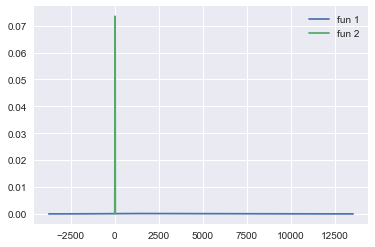

In [387]:
sns.kdeplot(np.array([function_one(i) for i in range(1,100)]),label='fun 1')
sns.kdeplot(function_two(range(1,100)) , label='fun 2')
plt.legend()

In [388]:
covariance_function(2.4,2)

1.6681421473598714e-08

In [389]:
# normal distribution to combine our model parameters
gp = lambda x,x_ : (mean_function(x),covariance_function(x,x_))

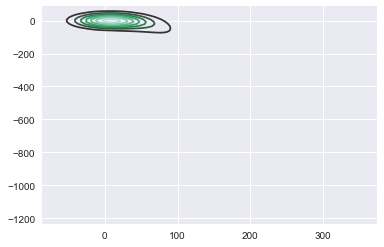

In [390]:
sns.kdeplot(np.array([gp(i,i) for i in range(1,100)]))

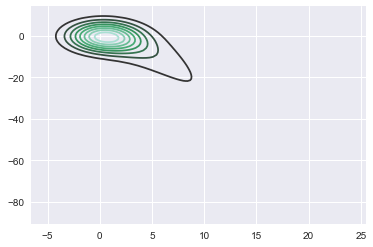

In [391]:
sns.kdeplot(np.array([gp(i,x) for i,x in zip(range(1,100),range(50,100))]))

# Gaussian  Normal Distirbution

- $ cov
f(xp), f(xq)

= k(xp, xq) = exp
−
1
2
|xp − xq|
2

. $
- $f∗ ∼ N
0, K(X∗, X∗)

, $

In [280]:
cov_normal = lambda x,x_ : np.exp(-.5*abs(x - x_)**2)

In [288]:
gaussian_vector = lambda x,x_ : sp.stats.norm(0,cov_normal(x,x_)).rvs()

(-5, 5)

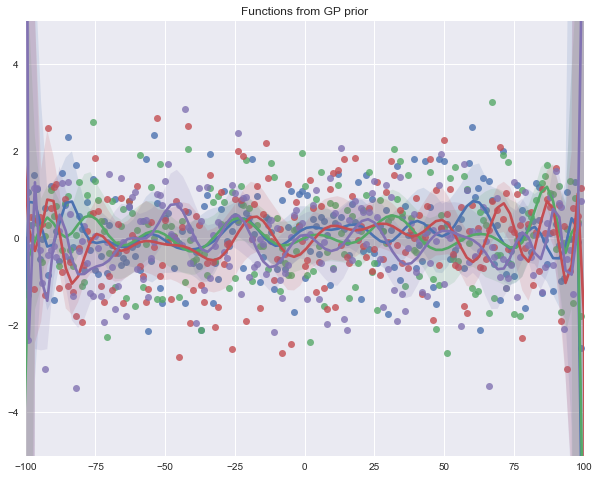

In [399]:

plt.figure(figsize=(10,8))
plt.title('Functions from GP prior')
sns.regplot(np.array(range(-100,100)),np.array([gaussian_vector(i,i) for i in range(-100,100)]),order=32)
sns.regplot(np.array(range(-100,100)),np.array([gaussian_vector(i,i) for i in range(-100,100)]),order=25)
sns.regplot(np.array(range(-100,100)),np.array([gaussian_vector(i,i) for i in range(-100,100)]),order = 27)
sns.regplot(np.array(range(-100,100)),np.array([gaussian_vector(i,i) for i in range(-100,100)]), order = 31)
plt.xlim(-100,100)
plt.ylim(-5,5)

## Noise free predictive distribution

$f∗|X∗, X,f ∼ N
K(X∗, X)K(X, X)
−1
f,
K(X∗, X∗) − K(X∗, X)K(X, X)
−1K(X, X∗)
$

Squarred Exponential =

- $exp
−
1
2
|xp − xq|
2

.$

In [640]:
squarred_exp_cv = lambda x_train,x_test : np.exp(-.5*abs(x_train - x_test)**2)

In [641]:
training = range(-100,100)
test = range(-200,100)
cov_training_training  = np.array([[cov_normal(x_,x_) for x_ in range(-100,100)] for _ in range(-100,100)])
cov_training_test = np.array([[cov_normal(x_,x) for (x_,x) in zip(range(-100,100),range(-200,100))]
                              for _ in range(-100,100)])

# Noisy predictive distribution
- training points = (-100,100)
- test points = (-200,300,400) # only two

In [517]:
training_funcion  =  lambda x: x/4

In [827]:
train_x = np.linspace(-500,100,300) # x values
test_x = np.linspace(-10,99,20)
train_y = np.array(list(map(training_funcion,train_x))).reshape(-1,1) # columns vector
train_y_var = np.var(train_y)

In [828]:
list(test_x)

[-10.0,
 -4.2631578947368425,
 1.473684210526315,
 7.2105263157894726,
 12.94736842105263,
 18.684210526315788,
 24.421052631578945,
 30.157894736842103,
 35.89473684210526,
 41.631578947368418,
 47.368421052631575,
 53.105263157894733,
 58.84210526315789,
 64.578947368421041,
 70.315789473684205,
 76.05263157894737,
 81.78947368421052,
 87.526315789473671,
 93.263157894736835,
 99.0]

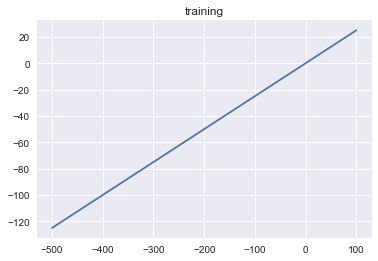

In [829]:
plt.plot(train_x,train_y)
plt.title('training');

In [830]:
train_y_var

1887.5418060200668

In [831]:

#squarred exponential covariance kernel
squarred_exponential_kernel = lambda x_,x: np.exp(-.5*(x_ - x)**2)


In [832]:
# find the covariance between the data points
cov_test_train_matrix = np.zeros((len(test_x),len(train_x)))
cov_test_test_matrix = np.zeros((len(test_x),len(test_x)))
cov_train_test_matrix = np.zeros((len(train_x),len(test_x)))
cov_train_train_matrix = np.zeros((len(train_x),len(train_x))) # assume noisy prediction
                                 

for idx_test, x_test in enumerate(test_x):
    for idx_train, x_train in enumerate(train_x):
        cov_test_train_matrix[idx_test,idx_train] = squarred_exponential_kernel(x_test,x_train)

for idx_test1, x_test1 in enumerate(test_x):
    for idx_test2, x_test2 in enumerate(test_x):
        cov_test_test_matrix[idx_test1,idx_test2]= squarred_exponential_kernel(x_test1,x_test2)
                                 
for idx_train, x_train in enumerate(train_x):
    for idx_test, x_test in enumerate(test_x):
        cov_train_test_matrix[idx_train,idx_test] = squarred_exponential_kernel(x_train,x_test)

for idx_train1, x_train1 in enumerate(train_x):
    for idx_train2, x_train2 in enumerate(train_x):
        cov_train_train_matrix[idx_train1,idx_train2] = squarred_exponential_kernel(x_train1,x_train2)
        
 

In [833]:
 # assume noisy predictions so teh covariance between the training points (train,train) has
# to add the variance of the y values
training_y_cov_matrix = np.zeros((len(cov_train_train_matrix),len(cov_train_train_matrix)), int)
np.fill_diagonal(training_y_cov_matrix, train_y_var)

In [834]:
cov_train_train_matrix = cov_train_train_matrix  + training_y_cov_matrix 

In [835]:
expected_mean_noisy_predictions = cov_test_train_matrix @ np.linalg.inv(cov_train_train_matrix) @train_y 

In [836]:
expected_mean_noisy_predictions  # test points,  predicted means

array([[-0.00167084],
       [-0.00071718],
       [ 0.00025115],
       [ 0.00120127],
       [ 0.00212311],
       [ 0.00304346],
       [ 0.00400115],
       [ 0.00500526],
       [ 0.00601691],
       [ 0.00697653],
       [ 0.00785747],
       [ 0.00869936],
       [ 0.00958654],
       [ 0.01058178],
       [ 0.01166724],
       [ 0.01274557],
       [ 0.01370913],
       [ 0.01452828],
       [ 0.015287  ],
       [ 0.01598296]])

In [837]:
test_x

array([-10.        ,  -4.26315789,   1.47368421,   7.21052632,
        12.94736842,  18.68421053,  24.42105263,  30.15789474,
        35.89473684,  41.63157895,  47.36842105,  53.10526316,
        58.84210526,  64.57894737,  70.31578947,  76.05263158,
        81.78947368,  87.52631579,  93.26315789,  99.        ])

In [838]:
expected_cov_noisy_predictions = cov_test_test_matrix - cov_test_train_matrix @ np.linalg.inv(cov_train_train_matrix)\
                    @ cov_train_test_matrix

In [839]:
expected_cov_noisy_predictions 

array([[  9.99499413e-001,  -3.60707238e-008,   7.86504468e-017,
         -5.15134731e-028,  -2.91415662e-036,   1.87762374e-046,
          1.02682962e-055,  -1.70319300e-065,  -4.11947444e-075,
          9.12557027e-085,   1.49613620e-094,  -3.91486962e-104,
         -3.27262773e-114,   1.82511162e-123,   2.50369655e-135,
         -8.98954200e-143,   2.74379175e-153,   3.69846602e-162,
         -2.20024988e-172,  -1.22776682e-181],
       [ -3.60707238e-008,   9.99454295e-001,  -3.11993651e-008,
          7.69513909e-017,  -1.38551157e-027,  -2.73281573e-036,
          2.77597656e-046,   1.05526401e-055,  -1.93786500e-065,
         -4.29064505e-075,   9.02252488e-085,   1.31238418e-094,
         -4.01961701e-104,  -2.03985061e-114,   2.02809226e-123,
         -1.50649332e-134,  -9.40413495e-143,   2.79690327e-153,
          3.46266838e-162,  -2.86829236e-172],
       [  7.86504468e-017,  -3.11993651e-008,   9.99466599e-001,
         -4.20315855e-008,   6.85806383e-017,  -2.87759630e-0

In [840]:
expected_cov_noisy_predictions.shape # NXN for the test points

(20, 20)

### Now, define a normal distribution given the parameters above

In [841]:
predictive_normal_noisy = sp.stats.multivariate_normal(expected_mean_noisy_predictions.ravel(),
                                                       expected_cov_noisy_predictions  )

In [842]:
predictive_normal_noisy.rvs()

array([ 0.11631433,  0.63064788, -0.14584552,  0.05949357, -1.9149441 ,
        0.48986877, -0.16532072,  0.46508993,  0.11344726, -0.6033401 ,
        1.0326625 , -1.96165292, -1.24253234, -0.19303591,  0.29424613,
       -0.28887835, -1.31724066,  1.15679366,  0.76111333, -1.07773477])

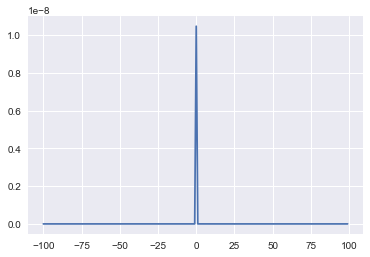

In [843]:
plt.plot(range(-100,100),[predictive_normal_noisy.pdf(i) for i in range(-100,100)])

In [844]:
predictive_normal_noisy.rvs(range_)

array([ 1.85273482, -1.29383106, -1.10035843,  0.96259757, -1.90368937,
       -1.7980305 , -2.67960172,  0.16163663,  1.48228845,  1.12602373,
        0.55455149,  0.60640082, -1.17230058,  0.11380901, -0.58935768,
       -1.15488053,  1.35193244,  0.51629356,  0.70305001, -1.59059142])

In [845]:
test_x

array([-10.        ,  -4.26315789,   1.47368421,   7.21052632,
        12.94736842,  18.68421053,  24.42105263,  30.15789474,
        35.89473684,  41.63157895,  47.36842105,  53.10526316,
        58.84210526,  64.57894737,  70.31578947,  76.05263158,
        81.78947368,  87.52631579,  93.26315789,  99.        ])

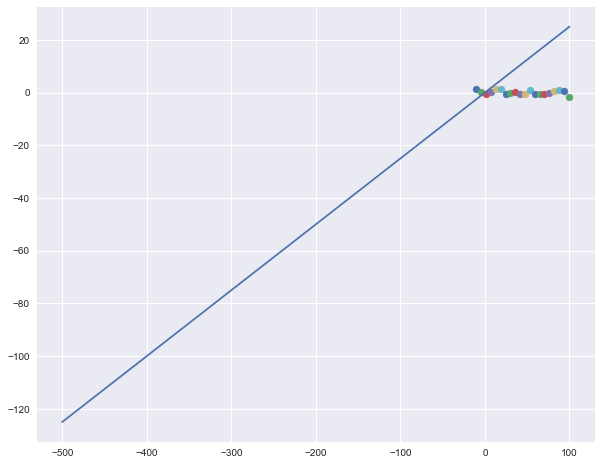

In [846]:
plt.figure(figsize=(10,8))
range_ = 1
predicted_points = predictive_normal_noisy.rvs(range_).T
#plt.scatter(test_x[0] ,predicted_points[0])

[plt.scatter(test_x[i],predicted_points[i]) for i in range(len(test_x))]
#plt.scatter(test_x[2],predicted_points[2])
#3plt.scatter(test_x[3],predicted_points[3])
plt.plot(train_x,train_y)
#plt.scatter(test_x[0],training_funcion(test_x[0]),label='X');#

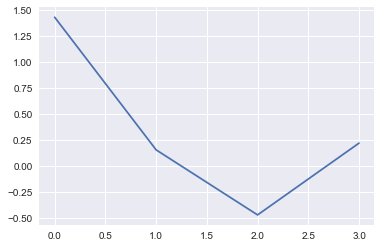

In [847]:
plt.plot([np.mean(predicted_points[0]), np.mean(predicted_points[1]), np.mean(predicted_points[2]),
         np.mean(predicted_points[3])])

In [ ]:
np.random.multivariate_normal()

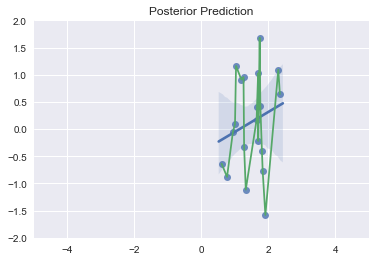

In [549]:
# random draws from the distrbution's posterior predictive
predicted_points = predictive_normal_noisy.rvs(20).T
predicted_points = np.array(sorted(predicted_points.T, key=lambda x: x[0])).T # sort the points
sns.regplot(*predicted_points,order=1)

#sns.regplot(*predicted_points,order=2)
plt.plot(*np.array(sorted(predicted_points.T, key=lambda x: x[0])).T) # plot them in order of smallest to largest
plt.xlim(-5,5)
plt.ylim(-2,2);
plt.title('Posterior Prediction')

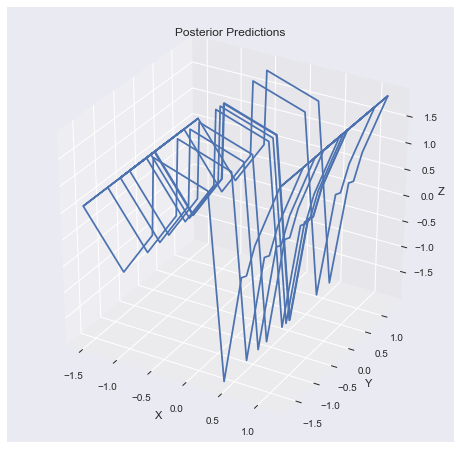

In [469]:


predicted_points = predictive_normal_noisy.rvs(10).T
predicted_points = np.array(sorted(predicted_points.T, key=lambda x: x[0])).T # sort the points

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

#t = np.linspace(-3, 2, 31)
#s = np.linspace(-3, 2, 31)
x = predicted_points[0]
y = predicted_points[1]
z = predicted_points[2]

X, Y = np.meshgrid(x,y)
Z  = np.meshgrid(z,y)

ax.plot_wireframe(X,Y,Z[0],ccount=1, rcount=10)
#ax.plot_wireframe(X,Y,Z[1],ccount=1)
#ax.plot_surface(x,y,z, cmap=cm.jet, rstride=1, cstride=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Posterior Predictions')

plt.show()

In [1708]:


x, y = np.mgrid[-5.0:5.0:50j, -5.0:5.0:50j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])
print(xy)
mu = np.array([0.0, 0.0])

sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)

z =predictive_normal_noisy .pdf(xy)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)





fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)
plt.title('PDF of multivariate gaussian process')
plt.show()

[[-5.         -5.        ]
 [-5.         -4.79591837]
 [-5.         -4.59183673]
 ..., 
 [ 5.          4.59183673]
 [ 5.          4.79591837]
 [ 5.          5.        ]]


ValueError: operands could not be broadcast together with shapes (2500,2) (20,) 

# Gaussian Regression with Cholesky Factorization

In [492]:
#squarred exponential covariance kernel
squarred_exponential_kernel = lambda x_,x: np.exp(-.5*abs(x_ - x)**2)

In [491]:
L = np.linalg.cholesky()

In [853]:

arr = numpy.array([1 for _ in range(10)])
mat = numpy.diag(arr)
mat

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

# New Attempt from Readings. Bayesian Gaussian Process Regression
- Gaussian Process for Regression: A Quick Introduction
    - M. Ebden

In [5]:
squarred_exponential_kernel = lambda max_covar, x1, x2, l: max_covar*np.exp( (x1-x2)**2 / 2*l**2 )


def squarred_exponential_kernel_w_noise( max_covar, x1, x2, l=1, train=False, var_y = None):
    """Calculated squarred exponential kernel.
    assumes x1 and x3 and matrices.
    if train = True, then return an additional noise parameter for the observations"""
    

    if train  == False:
        return max_covar*np.exp( -(x1-x2.T)**2 / 2*l**2 ) 
    else:
        arr = numpy.array([1 for _ in range(x1.shape[1])])
        mat = numpy.diag(arr)
        return max_covar*np.exp( -(x1-x2.T)**2 / 2*l**2 )  + var_y*mat # add noise for the observations

In [180]:
train_x = np.array(np.linspace(-20,20,2)).reshape(-1,1)
train_y_func = lambda x: x+4/(x**2-x**-1)
train_y_numbers = np.array([train_y_func(_) for _ in train_x]).reshape(-1,1)
y_var = np.var(train_y_numbers)
#max_covariance = np.sqrt(y_var) ## not sure a good number to choose for the noise of measuring your observations
max_covariance = 5
test_x = np.array(np.linspace(-15,15,25)).reshape(-1,1)

In [181]:
def test_gaussian_process(test_x, train_x, train_y_numbers,y_var, return_cov = False,
                          return_sample = False, max_cov = 10):
    """Test one new point in the Gaussian process or an array of points
    Returns the mean, var from normal distribution from the sampled point.
    Return cov = True will return the full covariance matrix.
    
    If return_sample= True 
    returns samples from the informed posterior and the uninformed prior distribution"""
    
    y_var = np.var(train_y_numbers)
    
    # define the covaraince functions
    covariance_train_train = squarred_exponential_kernel_w_noise(max_cov,
                                                                            train_x,train_x,train=True,var_y= y_var)
    covariance_test_train  = squarred_exponential_kernel_w_noise(max_cov,test_x,train_x)
    covariance_test_test  = squarred_exponential_kernel_w_noise(max_cov,test_x,test_x)

    # Use cholskey decomposition to increase speed for calculating mean
    try:
        L_test_test = np.linalg.cholesky(covariance_test_test + 1e-15*np.eye(len(test_x)))
        L_train_train = np.linalg.cholesky(covariance_train_train + .00005*np.eye(len(train_x)))
        Lk = np.linalg.solve(L_train_train, covariance_test_train.T)
        mus = np.dot(Lk.T, np.linalg.solve(L_train_train, train_y_numbers)).reshape((len(test_x),))
        # Compute the standard deviation so we can plot it
        s2 = np.diag(covariance_test_test) - np.sum(Lk**2, axis=0)
        stdv = np.sqrt(abs(s2))
        

    # Full matrix calculation of mean and covariance, much slower than cholesky decomposition
    except Exception as e:
        print(e)#LinAlgError: # In case the covaraince matrix is not positive definite 
        mus = covariance_test_train  @ np.linalg.pinv(covariance_train_train ) @ train_y_numbers
        s2 = covariance_test_test - covariance_test_train @ np.linalg.pinv(covariance_train_train ) \
                     @ covariance_test_train.T
        
    

    def sample_from_posterior(n_priors=3, n_posteriors=3):
        """Draw samples from the prior distribution of the GP.
        len(test_x) is the number of samplese to draw.
        Resource: http://katbailey.github.io/post/gaussian-processes-for-dummies/.
        
        N-Posteriors / N-Priors tells the number of functions to samples from the dsitribution"""

        
        # Draw samples from the posterior at our test points.
        L = np.linalg.cholesky(covariance_test_test + 1e-6*np.eye(len(test_x)) - np.dot(Lk.T, Lk))
        f_post = mus.reshape(-1,1) + np.dot(L, np.random.normal(size=(len(test_x),n_posteriors)))

        # Sample 3 sets of standard normals for our test points,
        # multiply them by the square root of the covariance matrix
        f_prior_uninformed = np.dot(L_test_test, np.random.normal(size=(len(test_x),n_priors)))
        return (f_prior_uninformed, f_post)


    if return_cov == True:
        return y_pred_mean.ravel(), var_y_pred_diag.ravel(), var_y_pred
        
    if return_sample == True:
        prior_post = sample_from_posterior()
        return mus.ravel(), s2.ravel(), prior_post[0], prior_post[1]
    else:
        return mus.ravel(), s2.ravel()
    
   

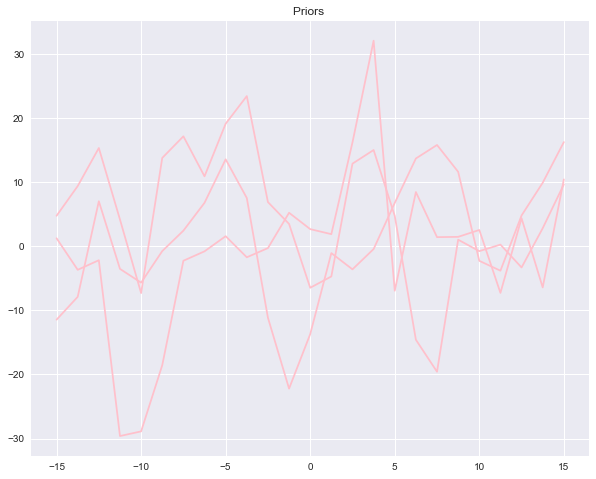

In [182]:
plt.figure(figsize=(10,8))
plt.plot(test_x,prior,color='pink')
plt.title("Priors ");


In [183]:
r = np.array(np.linspace(-20,20,2)).reshape(-1,1)

In [184]:
m,var, prior, post = test_gaussian_process(test_x, r, train_y_numbers, y_var, return_sample = True)

In [185]:

def sample_and_plot_posterior(train_x, train_y_func, test_gaussian_process, range_to_sample=np.linspace(-10,10,15)):
    """Plot potential posterior functions after sampling from the true function.
    Notice how the varaince decreases around the sampled points"""
    train_x = np.array(np.linspace(-20,20,1)).reshape(-1,1)
    train_y_numbers = np.array([train_y_func(_) for _ in train_x]).reshape(-1,1)
    for i in range_to_sample:
        print(f"Point Sampled x = {train_x.ravel()[-1]}")
        m,var, prior, post = test_gaussian_process(test_x, train_x, train_y_numbers, y_var, return_sample = True)
        plt.figure(figsize=(14,10))

        plt.gca().fill_between(test_x.flat, m-2*np.sqrt(var), m+2*np.sqrt(var), color="#dddddd",label='95% confidence')
        plt.scatter(train_x.ravel(), train_y_numbers,marker='*',label='Samples', linewidth=5, color='red')

        plt.plot(np.linspace(-20,20,200),[train_y_func(i) for i in np.linspace(-20,20,200)], label='real function',
                linestyle="--")
        plt.plot(test_x,post,color='black',label='Draws from the posterior');
        #plt.scatter(train_x,train_y_numbers)
        #plt.scatter(test_x,m,label='MU',color='red', linewidth=10, marker='*');
        plt.legend()
        plt.title('Posteriors, and Actual Function')
        plt.show();

        # Update training data with the sampled point
        train_x = train_x.ravel()
        train_x = np.append(train_x,i)
        train_x = train_x.reshape(-1,1)
        train_y_numbers = np.array([train_y_func(_) for _ in train_x]).reshape(-1,1)

        # sleep for three seconds
        time.sleep(3)

Point Sampled x = -20.0


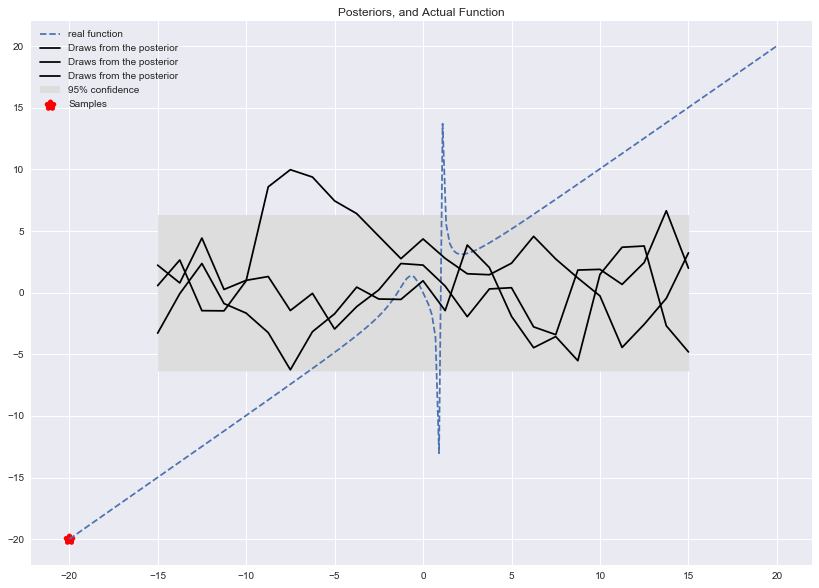

Point Sampled x = -10.0


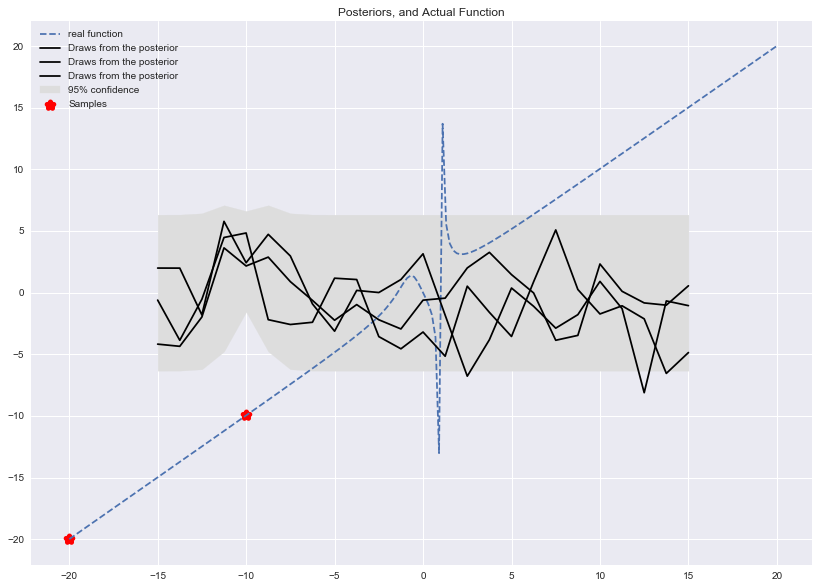

Point Sampled x = -8.571428571428571


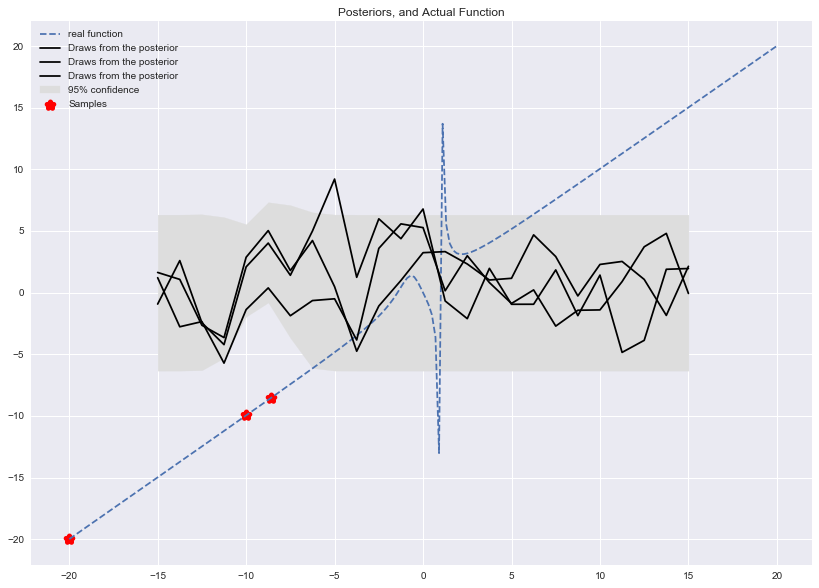

Point Sampled x = -7.142857142857142


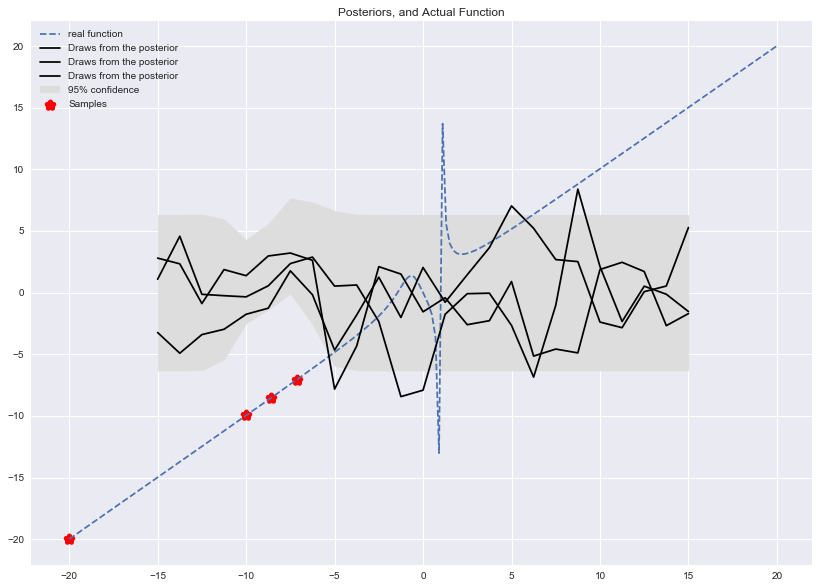

Point Sampled x = -5.714285714285714


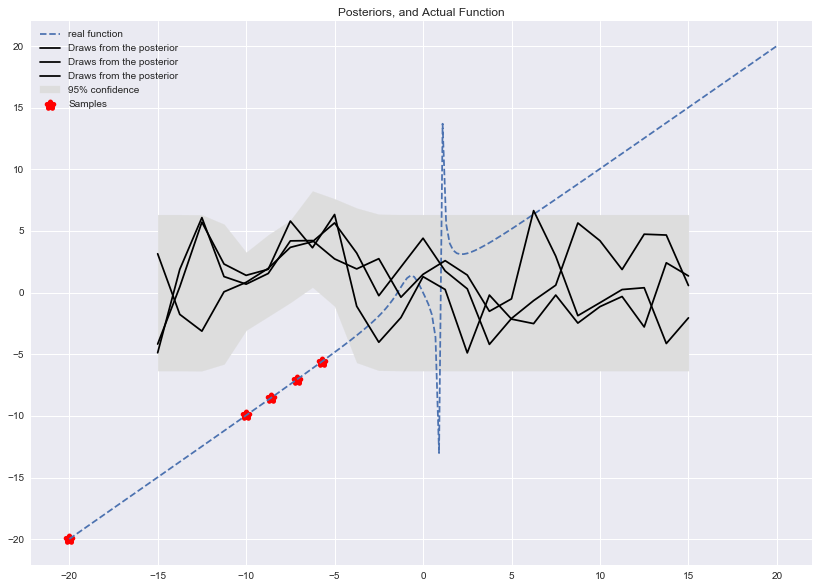

Point Sampled x = -4.285714285714286


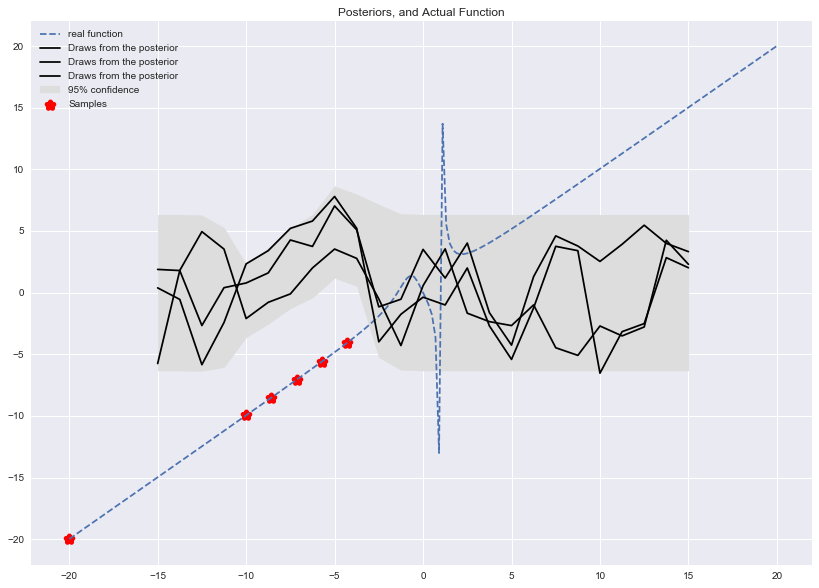

Point Sampled x = -2.8571428571428568


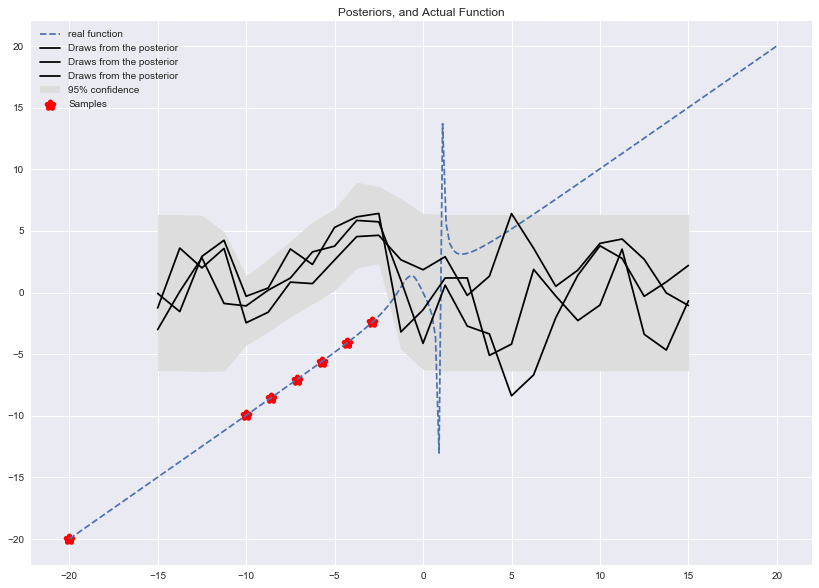

Point Sampled x = -1.4285714285714288


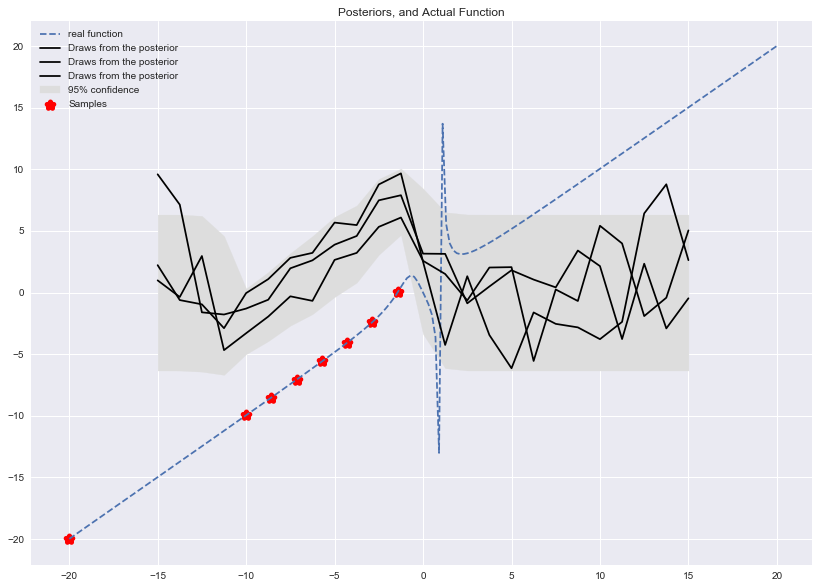

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  


Point Sampled x = 0.0


KeyboardInterrupt: 

In [186]:
sample_and_plot_posterior(train_x, train_y_func, test_gaussian_process)

### Best estimate for Y* is given by the mean of the distribution


### Implement Expected Improvement


In [187]:
def expected_improvement(mean_x, sigma_squarred_x, y_val_for_best_hyperparameters, normal_dist):
    """Finds the expected improvement of a point give the current best point.
    """
    with np.errstate(divide='ignore'): # in case sigma equals zero
        sigma_x = np.sqrt(sigma_squarred_x) # get the standard deviation from the variance

        Z = (mean_x - y_val_for_best_hyperparameters) / sigma_x
        
        if round(sigma_x,8) == 0:
            return 0
        else:

            return (mean_x - y_val_for_best_hyperparameters)*normal_dist.cdf(Z) + sigma_x*normal_dist.pdf(Z)

In [242]:
def sample_from_function( y_function, 
                        train_x, train_y_numbers, testing_domain = range(-200,200,10), n = 20,
                        adaption_n = .95):
    """Sample N times from the unknown function and for each time find the 
    point that will have the highest expected improvement (find the maxima of the function).
    
    Returns a generator of x_sampled_points, y_sampled_points, sampled_variance, best_x, best_y
    
    Starts off the search for expected improvement with a coarse search and then hones in on 
    the domain the the highest e xpected improvement.
    
    Adaption_n decreases the possible range of values to find a better number centered around the best x value"""
    start_point = np.random.randn()
    best_x = start_point
    best_y = y_function(start_point) # initial best y value based on start point
    start_y = y_function(start_point) 
    # for plotting the points sampled
    x_sampled_points = []
    y_sampled_points = []
    sampled_variance =[] 
    

    for i in range(n):
        if i == 0:
            
            s_p = np.array([testing_domain]).reshape(-1,1)
            
            
            # find the next x-point to sample
            mus, vars_ = test_gaussian_process(np.array(s_p), train_x, train_y_numbers, np.var(s_p) )
            sigmas = np.sqrt(abs(vars_))
            list_of_expected_improvements = []
    
            
            for m,v,point in zip(mus,vars_,s_p): # create a new normal for each point

                
                point_normal_distribution = stats.norm(m,v)
                current_expected_improvement = expected_improvement(m,
                                                    v, best_y  ,point_normal_distribution)
                #print(current_expected_improvement, ' EXPECTED IMPROVEMENT')
                list_of_expected_improvements.append(current_expected_improvement)
            # keep track of the best variables
            max_improv_x_idx = np.argmax(list_of_expected_improvements)
            max_improv_x = testing_domain[max_improv_x_idx]
  
            max_improv_y = y_function(max_improv_x  ) 
            if max_improv_y > best_y: ## use to find out where to search next
                best_y = max_improv_y 
                best_x = max_improv_x
            else:
                best_x = start_point
            

            sampled_variance.append(vars_[max_improv_x_idx])

            # append the point to sample
            x_sampled_points.append(max_improv_x)
            y_sampled_points.append(max_improv_y)
            
            # append our new the newly sampled point to the training data
            train_x = np.vstack((train_x, max_improv_x))
            train_y_numbers = np.vstack((train_y_numbers, max_improv_y))
            yield x_sampled_points, y_sampled_points, sampled_variance, best_x, best_y
            

        else:
            # adaptive sampling
            testing_domain_l = abs(int(testing_domain[0]*adaption_n))
            #print(testing_domain_l,'domain L')
            #print(best_x - testing_domain_l, ' x - lower')
            
            testing_domain_h = abs(int(testing_domain[-1]*adaption_n))
            #print(testing_domain_h,' domain H')
            # shorted the testing domain to be around the best point
            #testing_domain = range(int(testing_domain_l), int(testing_domain_h))
  
            testing_domain = np.linspace(best_x - testing_domain_l, best_x + testing_domain_h, num=200).reshape(-1,1)
            
            #print(testing_domain,best_x - (10_000/i),int(n/i))
            # generate a new  normal distribution based upon the sampled x
            
            #domain = np.array([np.linspace(testing_domain[0],testing_domain[-1],250)]).reshape(-1,1)
            
            # find the next x-point to sample
            mus, vars_ = test_gaussian_process(np.array(testing_domain), train_x, train_y_numbers, np.var(s_p) )
            sigmas = np.sqrt(abs(vars_))
            list_of_expected_improvements = []
            
            for m,v,point in zip(mus,vars_,testing_domain): # create a new normal for each point
                print(m,'m','v',v,'point',point)
                
                point_normal_distribution = stats.norm(m,v)
                current_expected_improvement = expected_improvement(m,
                                                    v, best_y  ,point_normal_distribution)
                #print(current_expected_improvement, ' EXPECTED IMPROVEMENT')
                list_of_expected_improvements.append(current_expected_improvement)
             # keep track of the best variables
            max_improv_x_idx = np.argmax(list_of_expected_improvements)
            max_improv_x = testing_domain[max_improv_x_idx]
            
  
            max_improv_y = y_function(max_improv_x )
    
            if max_improv_y > best_y: ## use to find out where to search next
                best_y = max_improv_y 
                best_x = max_improv_x
            else:
                pass

            sampled_variance.append(vars_[max_improv_x_idx])

            # append the point to sample
            x_sampled_points.append(max_improv_x)
            y_sampled_points.append(max_improv_y)
            
            # append our new the newly sampled point to the training data
            train_x = np.vstack((train_x, max_improv_x))
            train_y_numbers = np.vstack((train_y_numbers, max_improv_y))
            
            yield x_sampled_points, y_sampled_points, sampled_variance, best_x, best_y
         


    

In [243]:
samples = 30

In [244]:
#x, y, variance_of_estimate, best_x,best_y = 
gen = sample_from_function(train_y_func,train_x, train_y_numbers,n=samples )

Point on x-axis just sampled =20


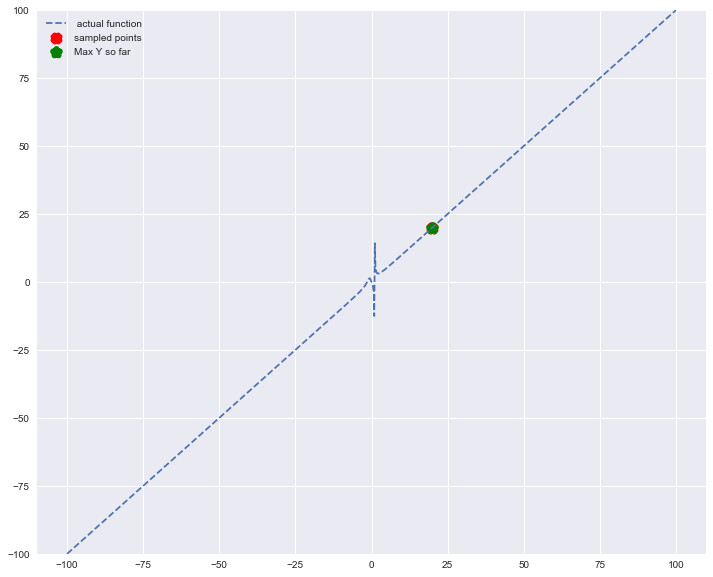

0.0 m v 10.0 point [-170.]
0.0 m v 10.0 point [-168.14070352]
0.0 m v 10.0 point [-166.28140704]
0.0 m v 10.0 point [-164.42211055]
0.0 m v 10.0 point [-162.56281407]
0.0 m v 10.0 point [-160.70351759]
0.0 m v 10.0 point [-158.84422111]
0.0 m v 10.0 point [-156.98492462]
0.0 m v 10.0 point [-155.12562814]
0.0 m v 10.0 point [-153.26633166]
0.0 m v 10.0 point [-151.40703518]
0.0 m v 10.0 point [-149.54773869]
0.0 m v 10.0 point [-147.68844221]
0.0 m v 10.0 point [-145.82914573]
0.0 m v 10.0 point [-143.96984925]
0.0 m v 10.0 point [-142.11055276]
0.0 m v 10.0 point [-140.25125628]
0.0 m v 10.0 point [-138.3919598]
0.0 m v 10.0 point [-136.53266332]
0.0 m v 10.0 point [-134.67336683]
0.0 m v 10.0 point [-132.81407035]
0.0 m v 10.0 point [-130.95477387]
0.0 m v 10.0 point [-129.09547739]
0.0 m v 10.0 point [-127.2361809]
0.0 m v 10.0 point [-125.37688442]
0.0 m v 10.0 point [-123.51758794]
0.0 m v 10.0 point [-121.65829146]
0.0 m v 10.0 point [-119.79899497]
0.0 m v 10.0 point [-117.93969

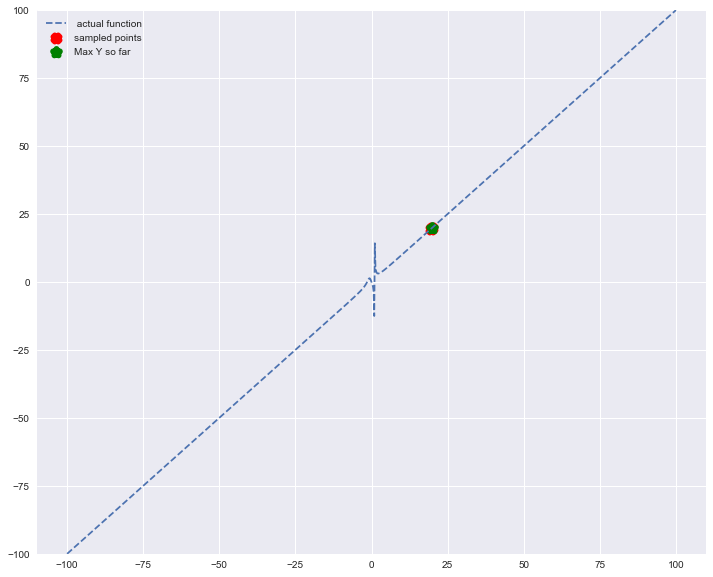

0.0 m v 10.0 point [-141.]
0.0 m v 10.0 point [-139.2361809]
0.0 m v 10.0 point [-137.47236181]
0.0 m v 10.0 point [-135.70854271]
0.0 m v 10.0 point [-133.94472362]
0.0 m v 10.0 point [-132.18090452]
0.0 m v 10.0 point [-130.41708543]
0.0 m v 10.0 point [-128.65326633]
0.0 m v 10.0 point [-126.88944724]
0.0 m v 10.0 point [-125.12562814]
0.0 m v 10.0 point [-123.36180905]
0.0 m v 10.0 point [-121.59798995]
0.0 m v 10.0 point [-119.83417085]
0.0 m v 10.0 point [-118.07035176]
0.0 m v 10.0 point [-116.30653266]
0.0 m v 10.0 point [-114.54271357]
0.0 m v 10.0 point [-112.77889447]
0.0 m v 10.0 point [-111.01507538]
0.0 m v 10.0 point [-109.25125628]
0.0 m v 10.0 point [-107.48743719]
0.0 m v 10.0 point [-105.72361809]
0.0 m v 10.0 point [-103.95979899]
0.0 m v 10.0 point [-102.1959799]
0.0 m v 10.0 point [-100.4321608]
0.0 m v 10.0 point [-98.66834171]
0.0 m v 10.0 point [-96.90452261]
0.0 m v 10.0 point [-95.14070352]
0.0 m v 10.0 point [-93.37688442]
0.0 m v 10.0 point [-91.61306533]
0

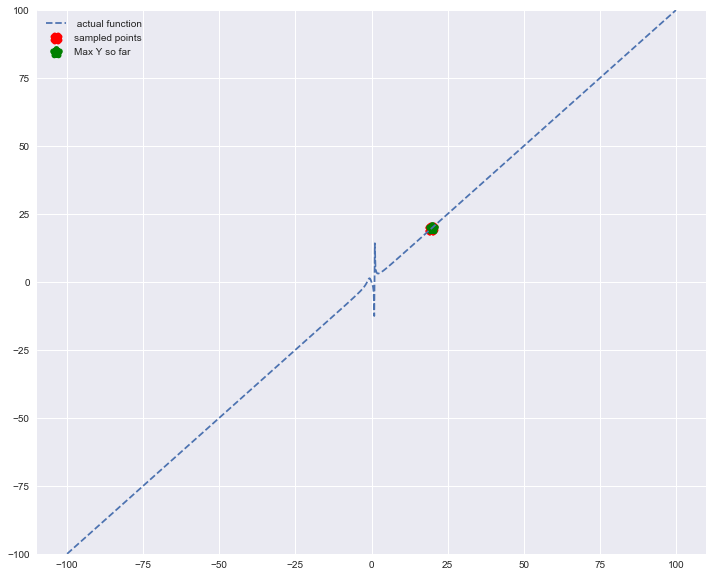

0.0 m v 10.0 point [-113.]
0.0 m v 10.0 point [-111.33165829]
0.0 m v 10.0 point [-109.66331658]
0.0 m v 10.0 point [-107.99497487]
0.0 m v 10.0 point [-106.32663317]
0.0 m v 10.0 point [-104.65829146]
0.0 m v 10.0 point [-102.98994975]
0.0 m v 10.0 point [-101.32160804]
0.0 m v 10.0 point [-99.65326633]
0.0 m v 10.0 point [-97.98492462]
0.0 m v 10.0 point [-96.31658291]
0.0 m v 10.0 point [-94.64824121]
0.0 m v 10.0 point [-92.9798995]
0.0 m v 10.0 point [-91.31155779]
0.0 m v 10.0 point [-89.64321608]
0.0 m v 10.0 point [-87.97487437]
0.0 m v 10.0 point [-86.30653266]
0.0 m v 10.0 point [-84.63819095]
0.0 m v 10.0 point [-82.96984925]
0.0 m v 10.0 point [-81.30150754]
0.0 m v 10.0 point [-79.63316583]
0.0 m v 10.0 point [-77.96482412]
0.0 m v 10.0 point [-76.29648241]
0.0 m v 10.0 point [-74.6281407]
0.0 m v 10.0 point [-72.95979899]
0.0 m v 10.0 point [-71.29145729]
0.0 m v 10.0 point [-69.62311558]
0.0 m v 10.0 point [-67.95477387]
0.0 m v 10.0 point [-66.28643216]
0.0 m v 10.0 poi

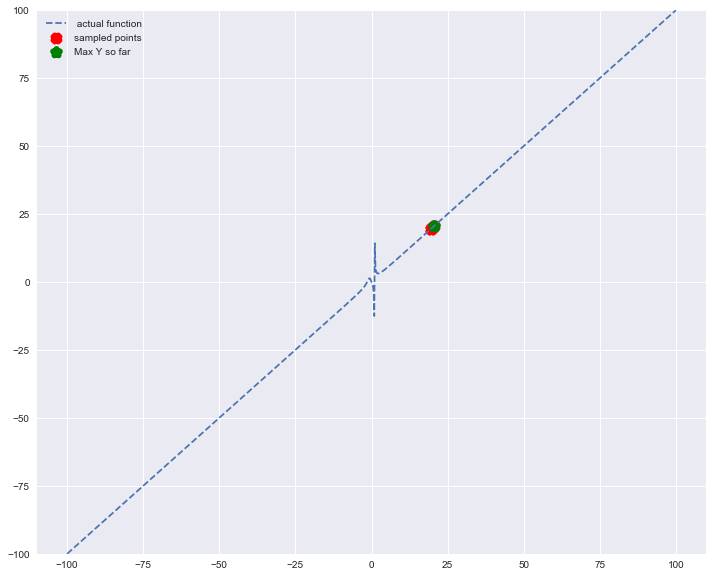

0.0 m v 10.0 point [-86.53266332]
0.0 m v 10.0 point [-84.94974874]
0.0 m v 10.0 point [-83.36683417]
0.0 m v 10.0 point [-81.7839196]
0.0 m v 10.0 point [-80.20100503]
0.0 m v 10.0 point [-78.61809045]
0.0 m v 10.0 point [-77.03517588]
0.0 m v 10.0 point [-75.45226131]
0.0 m v 10.0 point [-73.86934673]
0.0 m v 10.0 point [-72.28643216]
0.0 m v 10.0 point [-70.70351759]
0.0 m v 10.0 point [-69.12060302]
0.0 m v 10.0 point [-67.53768844]
0.0 m v 10.0 point [-65.95477387]
0.0 m v 10.0 point [-64.3718593]
0.0 m v 10.0 point [-62.78894472]
0.0 m v 10.0 point [-61.20603015]
0.0 m v 10.0 point [-59.62311558]
-1.44951634864e-313 m v 10.0 point [-58.04020101]
-5.86018912103e-288 m v 10.0 point [-56.45728643]
-1.93385468946e-263 m v 10.0 point [-54.87437186]
-5.20906451358e-240 m v 10.0 point [-53.29145729]
-1.14530017353e-217 m v 10.0 point [-51.70854271]
-2.05542961227e-196 m v 10.0 point [-50.12562814]
-3.01099187604e-176 m v 10.0 point [-48.54271357]
-3.60031293346e-157 m v 10.0 point [-46.

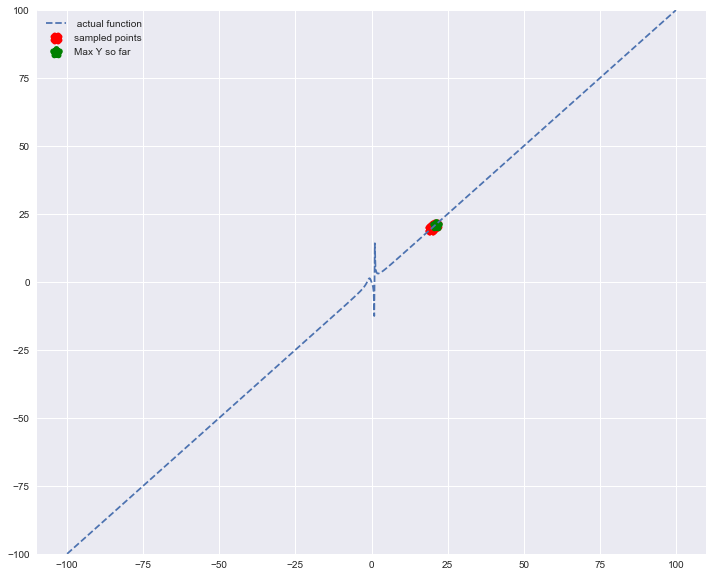

0.0 m v 10.0 point [-60.89447236]
0.0 m v 10.0 point [-59.3919598]
-4.83735112887e-311 m v 10.0 point [-57.88944724]
-8.28895181416e-287 m v 10.0 point [-56.38693467]
-1.48577386515e-263 m v 10.0 point [-54.88442211]
-2.78590890907e-241 m v 10.0 point [-53.38190955]
-5.46439653259e-220 m v 10.0 point [-51.87939698]
-1.12118840952e-199 m v 10.0 point [-50.37688442]
-2.40644582718e-180 m v 10.0 point [-48.87437186]
-5.4029963852e-162 m v 10.0 point [-47.3718593]
-1.26897878635e-144 m v 10.0 point [-45.86934673]
-3.11770589809e-128 m v 10.0 point [-44.36683417]
-8.01266571736e-113 m v 10.0 point [-42.86432161]
-2.15417014329e-98 m v 10.0 point [-41.36180905]
-6.05820656753e-85 m v 10.0 point [-39.85929648]
-1.78225257207e-72 m v 10.0 point [-38.35678392]
-5.48473337439e-61 m v 10.0 point [-36.85427136]
-1.76564296399e-50 m v 10.0 point [-35.35175879]
-5.94581446745e-41 m v 10.0 point [-33.84924623]
-2.09450265987e-32 m v 10.0 point [-32.34673367]
-7.71812088765e-25 m v 10.0 point [-30.844

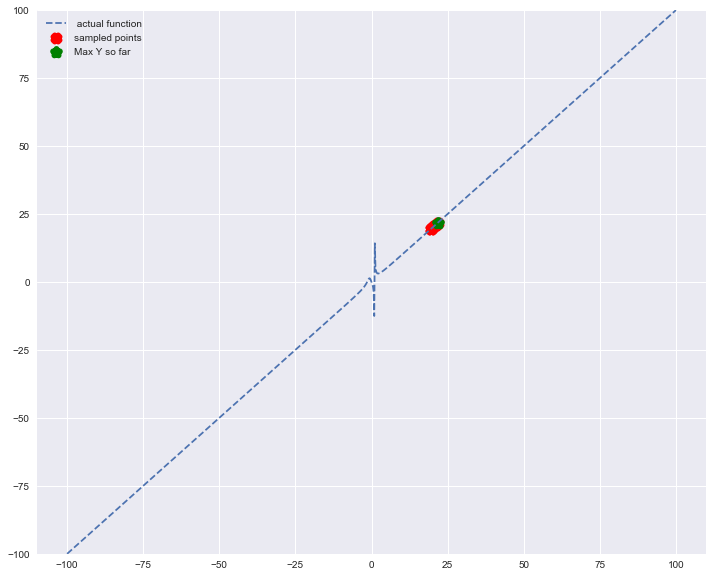

-7.85168998146e-50 m v 10.0 point [-35.25628141]
-7.55630662144e-41 m v 10.0 point [-33.83417085]
-9.62364348081e-33 m v 10.0 point [-32.4120603]
-1.62200804143e-25 m v 10.0 point [-30.98994975]
-3.61784540022e-19 m v 10.0 point [-29.5678392]
-1.06789986094e-13 m v 10.0 point [-28.14572864]
-4.1715223967e-09 m v 10.0 point [-26.72361809]
-2.15646370703e-05 m v 10.0 point [-25.30150754]
-0.0147527591184 m v 9.99999800716 point [-23.87939698]
-1.33563525307 m v 9.98366569554 point [-22.45728643]
-16.002433075 m v 7.65524787265 point [-21.03517588]
-25.3727587359 m v 4.10531938521 point [-19.61306533]
-5.32393671336 m v 9.74046814671 point [-18.19095477]
-0.147836476402 m v 9.9997998811 point [-16.76884422]
-0.00054326765084 m v 9.9999999973 point [-15.34673367]
-2.64198052716e-07 m v 10.0 point [-13.92462312]
-1.70031310933e-11 m v 10.0 point [-12.50251256]
-1.44814389678e-16 m v 10.0 point [-11.08040201]
-1.63221760355e-22 m v 10.0 point [-9.65829146]
-2.43460169882e-29 m v 10.0 point [

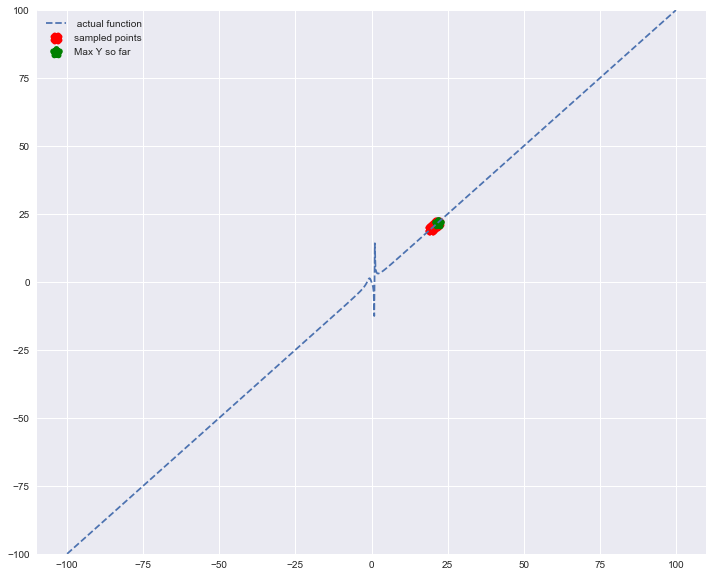

-7.05901826342e-16 m v 10.0 point [-11.25628141]
-2.19224349907e-21 m v 10.0 point [-9.90954774]
-1.11008704415e-27 m v 10.0 point [-8.56281407]
-9.16534959461e-35 m v 10.0 point [-7.2160804]
-1.23385689868e-42 m v 10.0 point [-5.86934673]
-2.70834702288e-51 m v 10.0 point [-4.52261307]
-9.69320916717e-61 m v 10.0 point [-3.1758794]
-5.65658889253e-71 m v 10.0 point [-1.82914573]
-5.37550629498e-82 m v 10.0 point [-0.48241206]
1.31140735337e-73 m v 10.0 point [ 0.86432161]
4.12308221154e-63 m v 10.0 point [ 2.21105528]
2.09848647572e-53 m v 10.0 point [ 3.55778894]
1.72539593445e-44 m v 10.0 point [ 4.90452261]
2.28528070046e-36 m v 10.0 point [ 6.25125628]
4.85672748166e-29 m v 10.0 point [ 7.59798995]
1.64684711502e-22 m v 10.0 point [ 8.94472362]
8.8364585376e-17 m v 10.0 point [ 10.29145729]
7.40962931318e-12 m v 10.0 point [ 11.63819095]
9.52279708778e-08 m v 10.0 point [ 12.98492462]
0.000181842251212 m v 9.99999999006 point [ 14.33165829]
0.0491061604214 m v 9.99936715115 point 

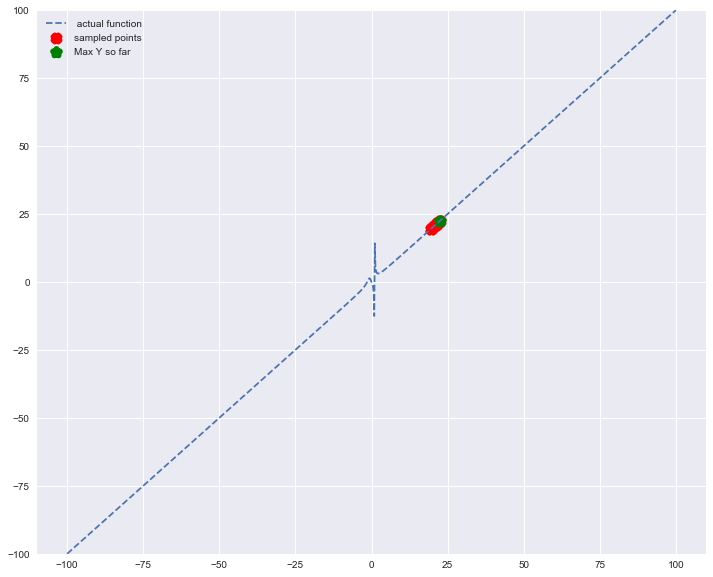

1.3207646793e-09 m v 10.0 point [ 12.4120603]
3.9433821478e-06 m v 9.99999999999 point [ 13.68341709]
0.00215360292617 m v 9.99999701083 point [ 14.95477387]
0.20592470893 m v 9.98163191222 point [ 16.22613065]
3.26408753068 m v 7.66679620429 point [ 17.49748744]
9.34503773304 m v 2.70544240421 point [ 18.76884422]
11.1324450679 m v 2.82479903197 point [ 20.04020101]
12.4010146327 m v 2.82462798348 point [ 21.31155779]
13.5334145068 m v 2.78174288255 point [ 22.58291457]
7.48167232788 m v 5.87905850245 point [ 23.85427136]
0.791692374428 m v 9.91558605473 point [ 25.12562814]
0.0140501279925 m v 9.9999634856 point [ 26.39698492]
4.44562108601e-05 m v 9.99999999957 point [ 27.66834171]
2.63445851216e-08 m v 10.0 point [ 28.93969849]
3.00789172236e-12 m v 10.0 point [ 30.21105528]
6.71785239776e-17 m v 10.0 point [ 31.48241206]
2.95793165248e-22 m v 10.0 point [ 32.75376884]
2.57767765781e-28 m v 10.0 point [ 34.02512563]
4.45424882361e-35 m v 10.0 point [ 35.29648241]
1.52762284349e-42 

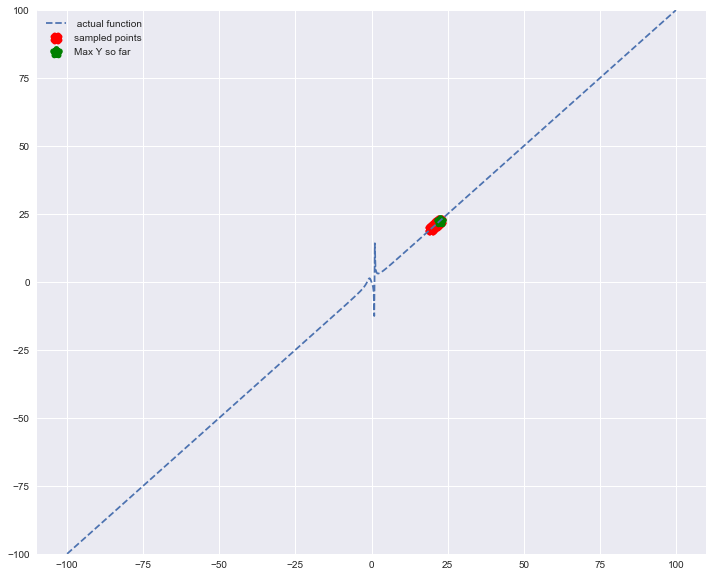

2.46644183432e-12 m v 10.0 point [ 11.58291457]
3.04008173147e-08 m v 10.0 point [ 12.90452261]
6.11099495889e-05 m v 9.99999999609 point [ 14.22613065]
0.019376237222 m v 9.9997178755 point [ 15.54773869]
0.922691477189 m v 9.64256194179 point [ 16.86934673]
6.4552550508 m v 3.67056698257 point [ 18.19095477]
10.1287346416 m v 2.73238902176 point [ 19.51256281]
11.4456699931 m v 2.73135092229 point [ 20.83417085]
12.7571683543 m v 2.72787800289 point [ 22.15577889]
12.0854861028 m v 2.69397892915 point [ 23.47738693]
3.07549241912 m v 8.94459947926 point [ 24.79899497]
0.113678871025 m v 9.99768853385 point [ 26.12060302]
0.000618224840281 m v 9.99999991167 point [ 27.44221106]
5.25674221027e-07 m v 10.0 point [ 28.7638191]
7.27523692954e-11 m v 10.0 point [ 30.08542714]
1.67890657941e-15 m v 10.0 point [ 31.40703518]
6.5557857011e-21 m v 10.0 point [ 32.72864322]
4.37151410141e-27 m v 10.0 point [ 34.05025126]
5.00768061656e-34 m v 10.0 point [ 35.3718593]
9.89411534816e-42 m v 10.0 

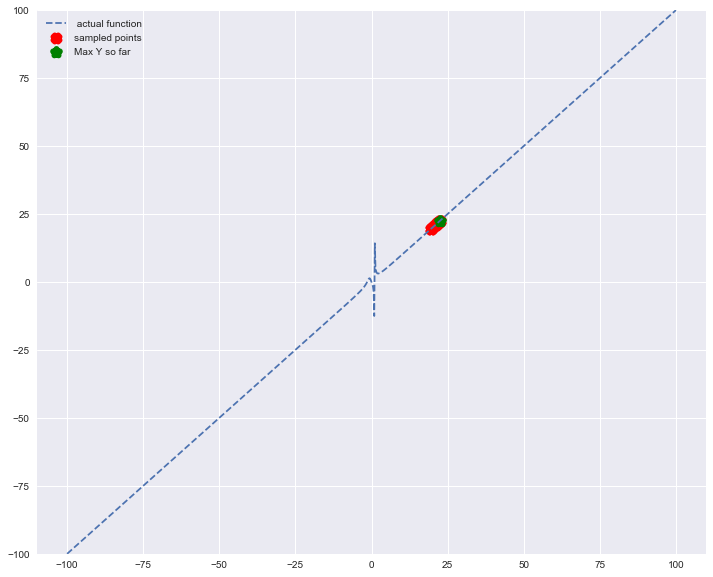

3.19793317216e-12 m v 10.0 point [ 11.58291457]
4.9672892122e-08 m v 10.0 point [ 12.94472362]
0.000111015131803 m v 9.99999999089 point [ 14.30653266]
0.0342124467889 m v 9.9993328546 point [ 15.66834171]
1.37537220365 m v 9.35421039032 point [ 17.03015075]
7.37988025518 m v 2.99184563642 point [ 18.3919598]
10.232966058 m v 2.6998014828 point [ 19.75376884]
11.5910978854 m v 2.69837859306 point [ 21.11557789]
12.9569571391 m v 2.70040663247 point [ 22.47738693]
10.4031478857 m v 3.50936935636 point [ 23.83919598]
1.68344517556 m v 9.63119656662 point [ 25.20100503]
0.0342289465113 m v 9.99975939802 point [ 26.56281407]
9.03143996035e-05 m v 9.99999999782 point [ 27.92462312]
3.29270246733e-08 m v 10.0 point [ 29.28643216]
1.73083841289e-12 m v 10.0 point [ 30.64824121]
1.34734478248e-17 m v 10.0 point [ 32.01005025]
1.57981825842e-23 m v 10.0 point [ 33.3718593]
2.82149401481e-30 m v 10.0 point [ 34.73366834]
7.73315774815e-38 m v 10.0 point [ 36.09547739]
3.26963574127e-46 m v 10.0 

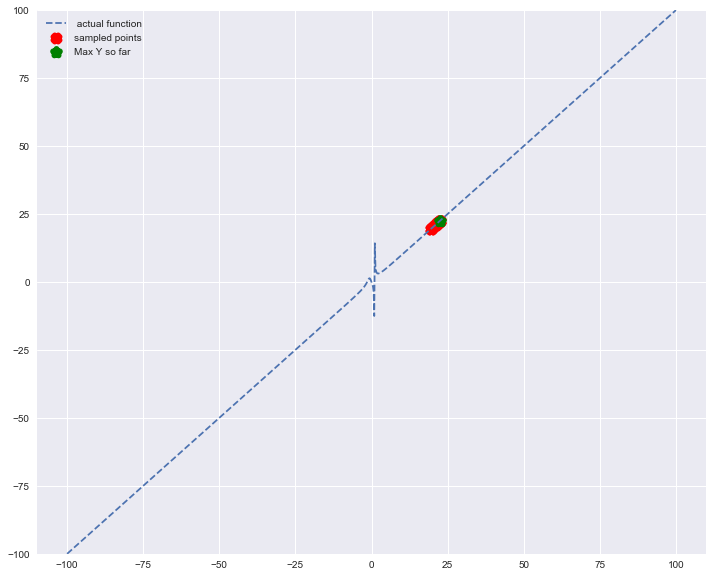

3.32408697029e-12 m v 10.0 point [ 11.58291457]
6.64208017372e-08 m v 10.0 point [ 12.98492462]
0.000169488752389 m v 9.99999998011 point [ 14.38693467]
0.0526226936501 m v 9.99852827095 point [ 15.78894472]
1.87154025664 m v 8.92243286354 point [ 17.19095477]
8.14419780252 m v 2.65169708656 point [ 18.59296482]
10.4428542804 m v 2.68639163962 point [ 19.99497487]
11.84580266 m v 2.68747483773 point [ 21.39698492]
13.1826603095 m v 2.66558106613 point [ 22.79899497]
7.98130658333 m v 5.26335402047 point [ 24.20100503]
0.702756437688 m v 9.92554414955 point [ 25.60301508]
0.00678787262726 m v 9.99998975364 point [ 27.00502513]
7.66477470513e-06 m v 9.99999999998 point [ 28.40703518]
1.07805808303e-09 m v 10.0 point [ 29.80904523]
1.96650129658e-14 m v 10.0 point [ 31.21105528]
4.76960096668e-20 m v 10.0 point [ 32.61306533]
1.56260543957e-26 m v 10.0 point [ 34.01507538]
6.98656832716e-34 m v 10.0 point [ 35.41708543]
4.29274644641e-42 m v 10.0 point [ 36.81909548]
3.64206884588e-51 m v

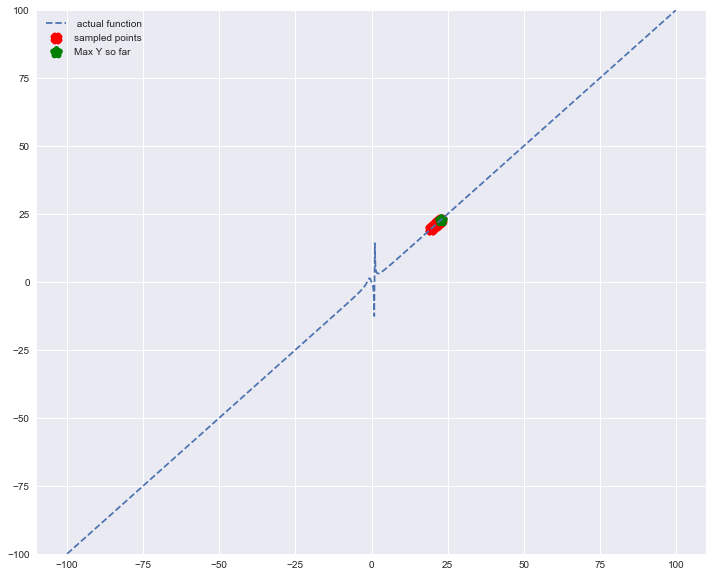

1.98454113237e-11 m v 10.0 point [ 11.79899497]
3.64938298463e-07 m v 10.0 point [ 13.24120603]
0.000748117276227 m v 9.99999968956 point [ 14.68341709]
0.160503479495 m v 9.98887760413 point [ 16.12562814]
3.38206455415 m v 7.22692923214 point [ 17.5678392]
8.95163517644 m v 2.53911850295 point [ 19.01005025]
10.5832369247 m v 2.62198736132 point [ 20.45226131]
12.0240151831 m v 2.62165383364 point [ 21.89447236]
13.0328397342 m v 2.5256146378 point [ 23.33668342]
5.05973324236 m v 7.62413017687 point [ 24.77889447]
0.207908909741 m v 9.99296000885 point [ 26.22110553]
0.000828103354365 m v 9.99999984616 point [ 27.66331658]
3.50514162022e-07 m v 10.0 point [ 29.10552764]
1.67976610794e-11 m v 10.0 point [ 30.54773869]
9.45718721468e-17 m v 10.0 point [ 31.98994975]
6.39298605852e-23 m v 10.0 point [ 33.4321608]
5.25836693291e-30 m v 10.0 point [ 34.87437186]
5.30716630725e-38 m v 10.0 point [ 36.31658291]
6.60895306766e-47 m v 10.0 point [ 37.75879397]
1.01922081682e-56 m v 10.0 poin

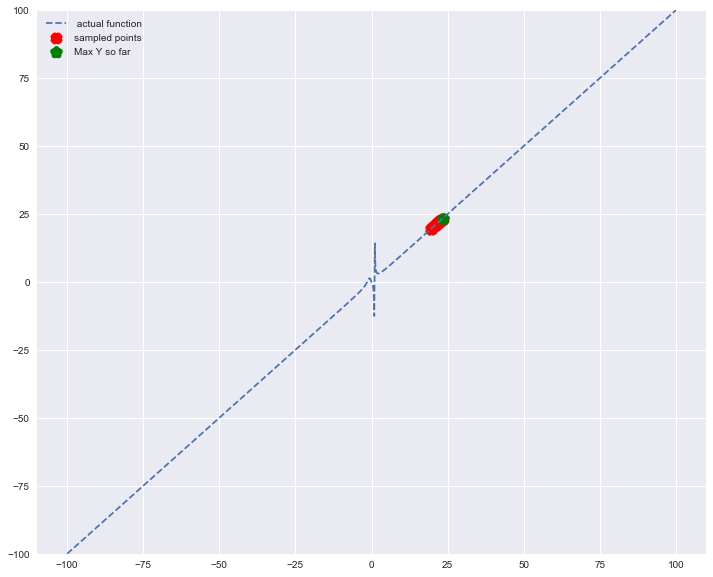

7.23764347075e-10 m v 10.0 point [ 12.33668342]
7.45273567733e-06 m v 9.99999999994 point [ 13.81407035]
0.00764373687168 m v 9.99995273636 point [ 15.29145729]
0.724757235372 m v 9.7504311699 point [ 16.76884422]
6.12632278865 m v 3.36407417351 point [ 18.24623116]
9.27807615959 m v 2.51625252113 point [ 19.72361809]
10.7523650515 m v 2.514979085 point [ 21.20100503]
12.2275323617 m v 2.51471023967 point [ 22.67839196]
11.8591155377 m v 2.5707641392 point [ 24.15577889]
2.34904713338 m v 9.33734688469 point [ 25.63316583]
0.0407233717343 m v 9.9996868875 point [ 27.11055276]
6.48389978647e-05 m v 9.99999999901 point [ 28.5879397]
1.04092076683e-08 m v 10.0 point [ 30.06532663]
1.77916168431e-13 m v 10.0 point [ 31.54271357]
3.33172179564e-19 m v 10.0 point [ 33.0201005]
6.93619520329e-26 m v 10.0 point [ 34.49748744]
1.61708046744e-33 m v 10.0 point [ 35.97487437]
4.23680468272e-42 m v 10.0 point [ 37.45226131]
1.24961864512e-51 m v 10.0 point [ 38.92964824]
4.1523633713e-62 m v 10.0 

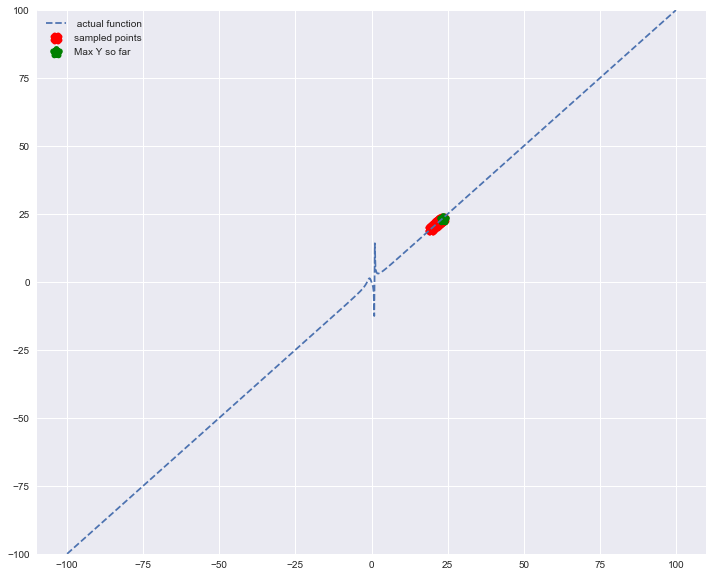

7.2151585546e-10 m v 10.0 point [ 12.33668342]
9.25740740264e-06 m v 9.99999999991 point [ 13.85427136]
0.010400856103 m v 9.99991393894 point [ 15.3718593]
0.943132247181 m v 9.60166723212 point [ 16.88944724]
6.77653572362 m v 2.8513522119 point [ 18.40703518]
9.48772337185 m v 2.51116043951 point [ 19.92462312]
11.0031916085 m v 2.51103261139 point [ 21.44221106]
12.5318309368 m v 2.51512960013 point [ 22.95979899]
10.1445852374 m v 3.48043053433 point [ 24.47738693]
1.10114349344 m v 9.83149631241 point [ 25.99497487]
0.00902354617974 m v 9.99998318896 point [ 27.51256281]
6.12976001801e-06 m v 9.99999999999 point [ 29.03015075]
3.7719900025e-10 m v 10.0 point [ 30.54773869]
2.20786385932e-15 m v 10.0 point [ 32.06532663]
1.26060353983e-21 m v 10.0 point [ 33.58291457]
7.11003421985e-29 m v 10.0 point [ 35.10050251]
3.98601583881e-37 m v 10.0 point [ 36.61809045]
2.22776651125e-46 m v 10.0 point [ 38.13567839]
1.24299893251e-56 m v 10.0 point [ 39.65326633]
6.92825614756e-68 m v 10

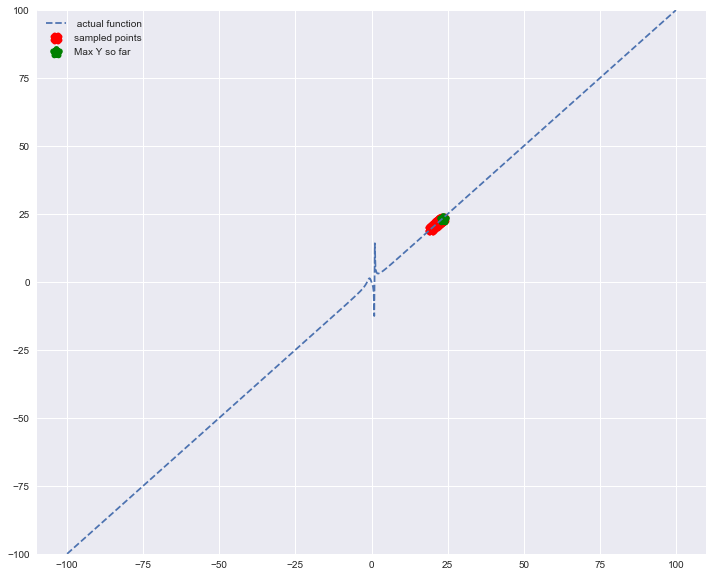

6.44883726275e-10 m v 10.0 point [ 12.33668342]
1.0161198336e-05 m v 9.99999999986 point [ 13.88944724]
0.0125799746038 m v 9.99985484198 point [ 15.44221106]
1.12272700765 m v 9.41385208082 point [ 16.99497487]
7.17636902146 m v 2.5644716246 point [ 18.54773869]
9.57420004107 m v 2.4908726046 point [ 20.10050251]
11.1254970854 m v 2.49113203098 point [ 21.65326633]
12.6862615371 m v 2.49416505345 point [ 23.20603015]
8.72460713825 m v 4.468286146 point [ 24.75879397]
0.611666769365 m v 9.94135994073 point [ 26.31155779]
0.0028282682048 m v 9.99999814305 point [ 27.86432161]
9.63410271981e-07 m v 10.0 point [ 29.41708543]
2.63771739095e-11 m v 10.0 point [ 30.96984925]
6.09368456979e-17 m v 10.0 point [ 32.52261307]
1.22009516392e-23 m v 10.0 point [ 34.07537688]
2.14917740349e-31 m v 10.0 point [ 35.6281407]
3.35888235139e-40 m v 10.0 point [ 37.18090452]
4.68008654016e-50 m v 10.0 point [ 38.73366834]
5.82962613238e-61 m v 10.0 point [ 40.28643216]
6.50177830945e-73 m v 10.0 point [ 

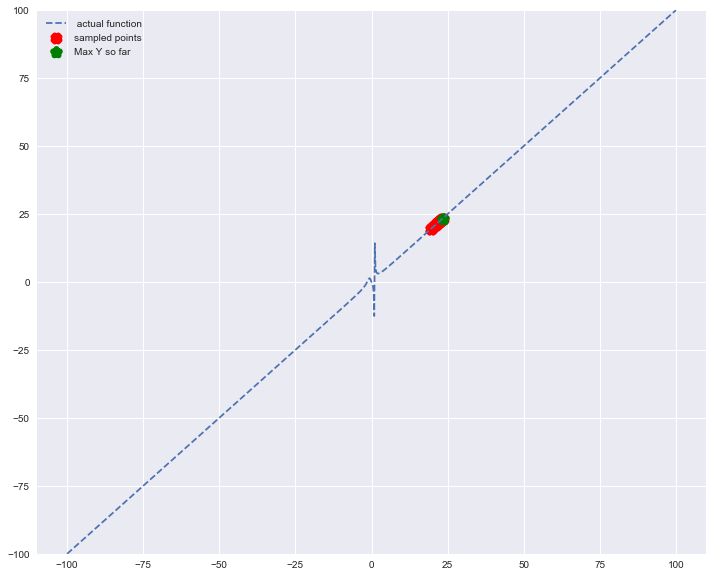

6.28346738926e-10 m v 10.0 point [ 12.33668342]
1.19603020866e-05 m v 9.9999999998 point [ 13.92462312]
0.0159089771696 m v 9.99976032019 point [ 15.51256281]
1.35147053141 m v 9.16571157291 point [ 17.10050251]
7.51632000272 m v 2.41607156742 point [ 18.68844221]
9.66560700985 m v 2.47184999551 point [ 20.27638191]
11.251124734 m v 2.47149433949 point [ 21.86432161]
12.8171698312 m v 2.46488793614 point [ 23.45226131]
7.14300949478 m v 5.7383443351 point [ 25.04020101]
0.319538104903 m v 9.98156813841 point [ 26.6281407]
0.000843795507133 m v 9.99999979945 point [ 28.2160804]
1.47204918279e-07 m v 10.0 point [ 29.8040201]
1.83718165714e-12 m v 10.0 point [ 31.3919598]
1.71479891979e-18 m v 10.0 point [ 32.9798995]
1.22763373046e-25 m v 10.0 point [ 34.5678392]
6.8430123077e-34 m v 10.0 point [ 36.15577889]
2.99794031379e-43 m v 10.0 point [ 37.74371859]
1.03860162598e-53 m v 10.0 point [ 39.33165829]
2.8570567463e-65 m v 10.0 point [ 40.91959799]
6.25870519872e-78 m v 10.0 point [ 42.

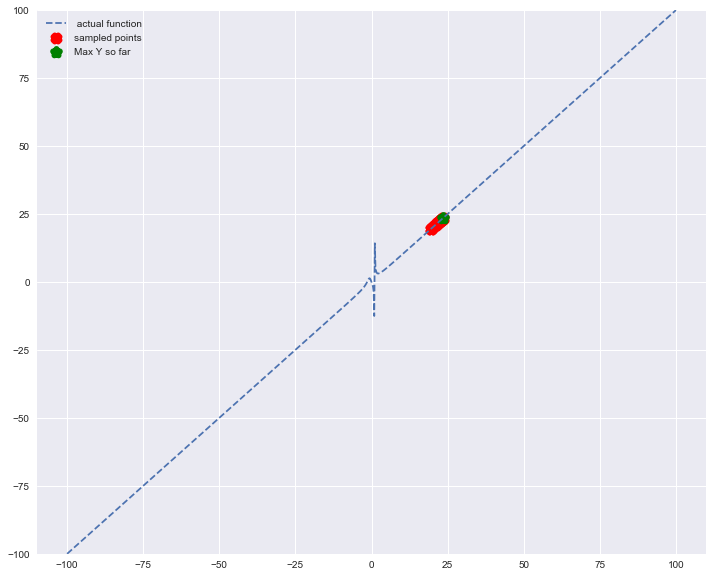

1.40561154554e-09 m v 10.0 point [ 12.45226131]
2.56613572644e-05 m v 9.99999999909 point [ 14.07035176]
0.0293020485989 m v 9.99920397714 point [ 15.68844221]
1.9080732463 m v 8.46961584443 point [ 17.30653266]
7.92594986525 m v 2.35492614332 point [ 18.92462312]
9.7778220231 m v 2.44105492517 point [ 20.54271357]
11.3935441112 m v 2.44038016747 point [ 22.16080402]
12.8862632688 m v 2.40515431638 point [ 23.77889447]
5.37215698907 m v 7.192889511 point [ 25.39698492]
0.142583472474 m v 9.99598925948 point [ 27.01507538]
0.000203327620721 m v 9.99999998782 point [ 28.63316583]
1.75340298386e-08 m v 10.0 point [ 30.25125628]
9.87168755308e-14 m v 10.0 point [ 31.86934673]
3.786762431e-20 m v 10.0 point [ 33.48743719]
1.01412863122e-27 m v 10.0 point [ 35.10552764]
1.92382336823e-36 m v 10.0 point [ 36.72361809]
2.6085176506e-46 m v 10.0 point [ 38.34170854]
2.54272358524e-57 m v 10.0 point [ 39.95979899]
1.78880351662e-69 m v 10.0 point [ 41.57788945]
9.10626961092e-83 m v 10.0 point [

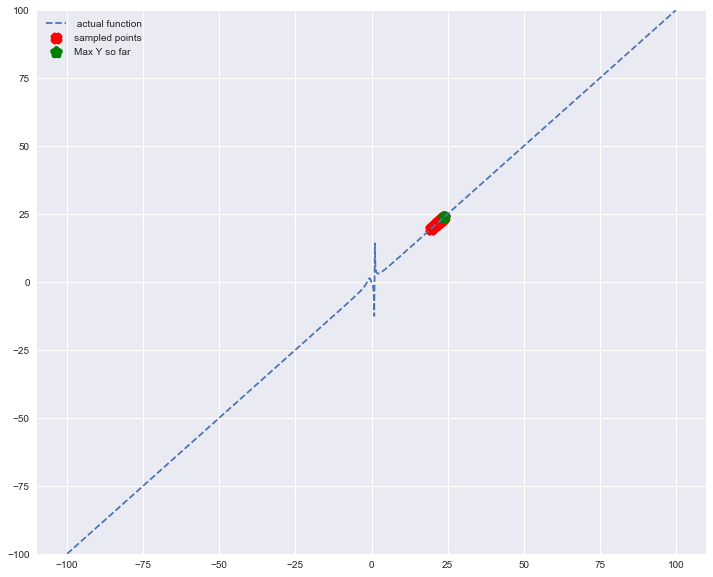

1.44580175985e-08 m v 10.0 point [ 12.77889447]
0.00016897899146 m v 9.99999996924 point [ 14.42713568]
0.107133488586 m v 9.99135282757 point [ 16.07537688]
3.38847711021 m v 6.21332107775 point [ 17.72361809]
8.22339881308 m v 2.36408650029 point [ 19.3718593]
9.88330297259 m v 2.37275588251 point [ 21.0201005]
11.5320218822 m v 2.37343888102 point [ 22.66834171]
12.6821546538 m v 2.27983521525 point [ 24.31658291]
3.41638692317 m v 8.66512705225 point [ 25.96482412]
0.0469843479244 m v 9.99954784344 point [ 27.61306533]
3.1936251941e-05 m v 9.99999999972 point [ 29.26130653]
1.21487063019e-09 m v 10.0 point [ 30.90954774]
2.78452380659e-15 m v 10.0 point [ 32.55778894]
4.00279449917e-22 m v 10.0 point [ 34.20603015]
3.68983614849e-30 m v 10.0 point [ 35.85427136]
2.20878630861e-39 m v 10.0 point [ 37.50251256]
8.64899649548e-50 m v 10.0 point [ 39.15075377]
2.22480124624e-61 m v 10.0 point [ 40.79899497]
3.76891330442e-74 m v 10.0 point [ 42.44723618]
4.21094918466e-88 m v 10.0 poin

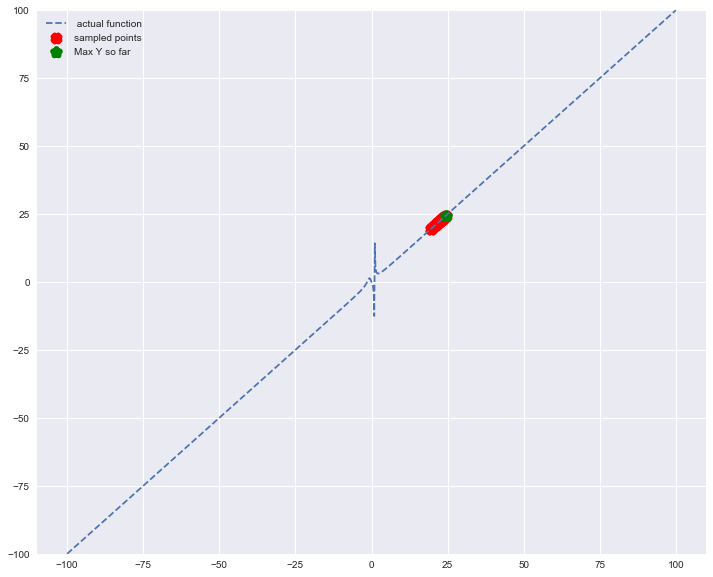

6.00444257218e-10 m v 10.0 point [ 12.31658291]
1.88885386567e-05 m v 9.99999999956 point [ 14.]
0.0290404781931 m v 9.99922862988 point [ 15.68341709]
1.95790375047 m v 8.20440105258 point [ 17.36683417]
7.23947941789 m v 2.21973445506 point [ 19.05025126]
9.0344815407 m v 2.2763049622 point [ 20.73366834]
10.7149266016 m v 2.27557005785 point [ 22.41708543]
12.4176027447 m v 2.28216490164 point [ 24.10050251]
7.51636123963 m v 5.32298820088 point [ 25.7839196]
0.286384837654 m v 9.98638266278 point [ 27.46733668]
0.000468230630521 m v 9.99999995088 point [ 29.15075377]
3.8028151448e-08 m v 10.0 point [ 30.83417085]
1.68053545591e-13 m v 10.0 point [ 32.51758794]
4.21940042106e-20 m v 10.0 point [ 34.20100503]
6.13694668816e-28 m v 10.0 point [ 35.88442211]
5.21472705925e-37 m v 10.0 point [ 37.5678392]
2.5980921905e-47 m v 10.0 point [ 39.25125628]
7.6010946201e-59 m v 10.0 point [ 40.93467337]
1.30667259418e-71 m v 10.0 point [ 42.61809045]
1.32019257126e-85 m v 10.0 point [ 44.3015

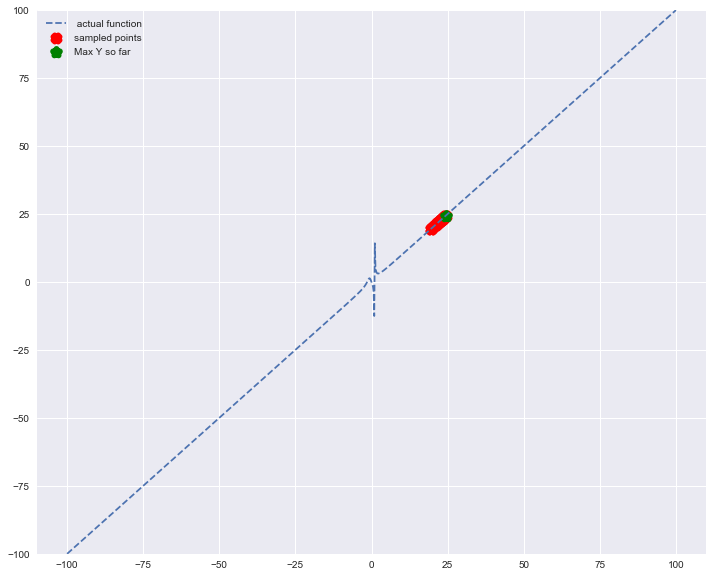

3.47631525268e-07 m v 10.0 point [ 13.31658291]
0.00210794574363 m v 9.99999397736 point [ 15.02512563]
0.541415646221 m v 9.77923671958 point [ 16.73366834]
5.68019981987 m v 2.57428760361 point [ 18.44221106]
8.27116531146 m v 2.24331194585 point [ 20.15075377]
9.97875954971 m v 2.24370362084 point [ 21.85929648]
11.6847430074 m v 2.24326120414 point [ 23.5678392]
11.5671927435 m v 2.36889348415 point [ 25.27638191]
1.46221513735 m v 9.69040784434 point [ 26.98492462]
0.00695042890053 m v 9.99998828623 point [ 28.69346734]
1.3544379634e-06 m v 10.0 point [ 30.40201005]
1.22017819574e-11 m v 10.0 point [ 32.11055276]
5.42789983099e-18 m v 10.0 point [ 33.81909548]
1.23561565597e-25 m v 10.0 point [ 35.52763819]
1.46877472197e-34 m v 10.0 point [ 37.2361809]
9.22674031301e-45 m v 10.0 point [ 38.94472362]
3.08576315247e-56 m v 10.0 point [ 40.65326633]
5.51982911234e-69 m v 10.0 point [ 42.36180905]
5.29726437153e-83 m v 10.0 point [ 44.07035176]
2.73279620569e-98 m v 10.0 point [ 45.7

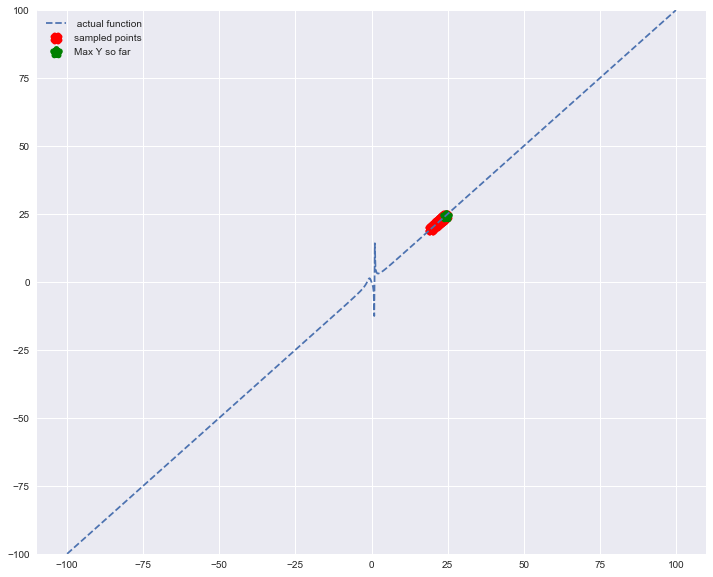

5.08030083046e-10 m v 10.0 point [ 12.31658291]
2.24597209534e-05 m v 9.99999999917 point [ 14.06030151]
0.0393694319017 m v 9.99829722671 point [ 15.8040201]
2.43265225031 m v 7.25755576685 point [ 17.54773869]
7.40039030132 m v 2.22491143948 point [ 19.29145729]
9.16498043105 m v 2.24057682094 point [ 21.03517588]
10.9067663707 m v 2.24050037847 point [ 22.77889447]
12.5976690218 m v 2.22614406416 point [ 24.52261307]
5.17581212672 m v 7.28351009417 point [ 26.26633166]
0.0878878791255 m v 9.99842173472 point [ 28.01005025]
5.01664881906e-05 m v 9.99999999927 point [ 29.75376884]
1.11878143668e-09 m v 10.0 point [ 31.49748744]
1.06590029835e-15 m v 10.0 point [ 33.24120603]
4.54749304402e-23 m v 10.0 point [ 34.98492462]
8.91457093528e-32 m v 10.0 point [ 36.72864322]
8.14956401585e-42 m v 10.0 point [ 38.47236181]
3.50537095441e-53 m v 10.0 point [ 40.2160804]
7.13339886004e-66 m v 10.0 point [ 41.95979899]
6.89208482974e-80 m v 10.0 point [ 43.70351759]
3.16877053458e-95 m v 10.0 p

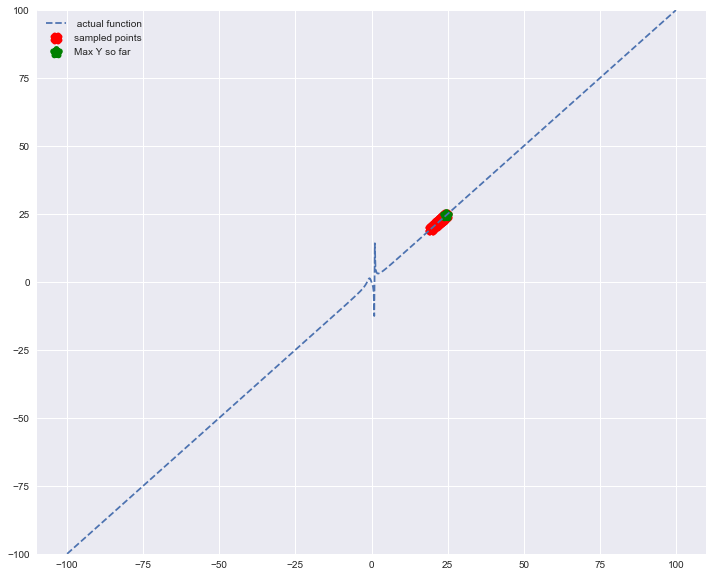

1.06646586657e-06 m v 10.0 point [ 13.52261307]
0.00570102558406 m v 9.99995129018 point [ 15.29145729]
1.01848688238 m v 9.25787590879 point [ 17.06030151]
6.45775398345 m v 2.13482912081 point [ 18.82914573]
8.49632897755 m v 2.20115138098 point [ 20.59798995]
10.2639543673 m v 2.20088568658 point [ 22.36683417]
12.0303636502 m v 2.20053244562 point [ 24.13567839]
9.20286215838 m v 3.78923714006 point [ 25.90452261]
0.443733848381 m v 9.96513178657 point [ 27.67336683]
0.000634766990225 m v 9.99999988641 point [ 29.44221106]
3.12150592438e-08 m v 10.0 point [ 31.21105528]
5.87891894354e-14 m v 10.0 point [ 32.9798995]
4.48646007516e-21 m v 10.0 point [ 34.74874372]
1.43002589487e-29 m v 10.0 point [ 36.51758794]
1.93692793869e-39 m v 10.0 point [ 38.28643216]
1.12644613654e-50 m v 10.0 point [ 40.05527638]
2.83104611192e-63 m v 10.0 point [ 41.8241206]
3.08770403852e-77 m v 10.0 point [ 43.59296482]
1.46545016092e-92 m v 10.0 point [ 45.36180905]
3.03216354289e-109 m v 10.0 point [ 4

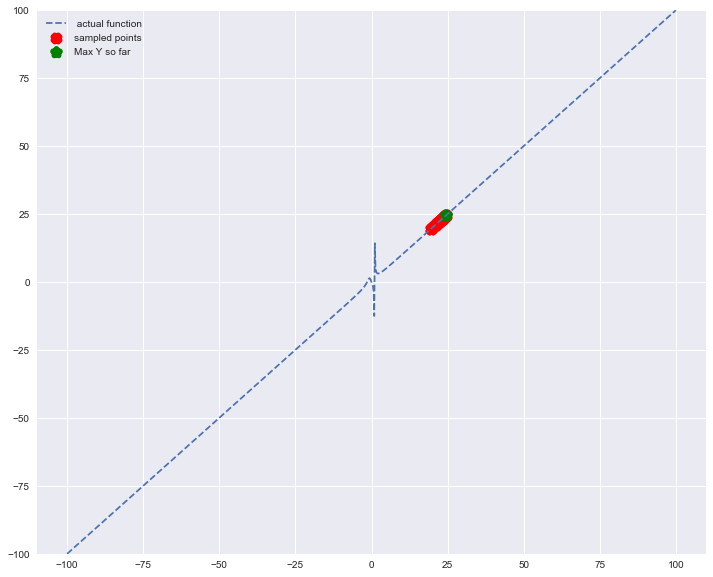

1.94380771848e-09 m v 10.0 point [ 12.52261307]
8.00961609395e-05 m v 9.99999998807 point [ 14.32663317]
0.103083935954 m v 9.98803801706 point [ 16.13065327]
3.69678597608 m v 4.81496193475 point [ 17.93467337]
7.64912055467 m v 2.19917602 point [ 19.73869347]
9.45081465589 m v 2.19840794996 point [ 21.54271357]
11.2537694192 m v 2.19839973191 point [ 23.34673367]
12.44129409 m v 2.11695292458 point [ 25.15075377]
2.34595824069 m v 9.27273795122 point [ 26.95477387]
0.0121391629968 m v 9.99996363742 point [ 28.75879397]
1.76942500944e-06 m v 10.0 point [ 30.56281407]
8.36969570727e-12 m v 10.0 point [ 32.36683417]
1.38579566451e-18 m v 10.0 point [ 34.17085427]
8.35650379699e-27 m v 10.0 point [ 35.97487437]
1.87606021913e-36 m v 10.0 point [ 37.77889447]
1.58849760325e-47 m v 10.0 point [ 39.58291457]
5.11332997297e-60 m v 10.0 point [ 41.38693467]
6.28929684899e-74 m v 10.0 point [ 43.19095477]
2.96564750063e-89 m v 10.0 point [ 44.99497487]
5.37292722529e-106 m v 10.0 point [ 46.79

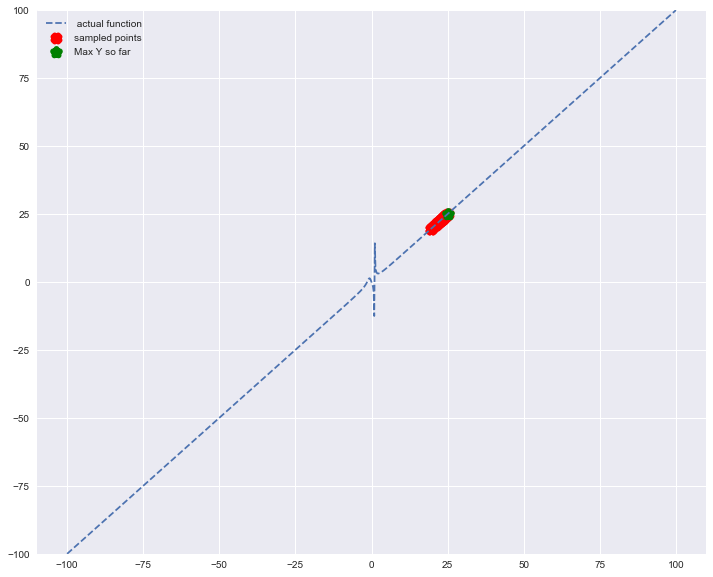

3.37149163916e-05 m v 9.9999999979 point [ 14.15075377]
0.0621115968146 m v 9.99511912027 point [ 15.97487437]
2.94760057933 m v 5.66286909743 point [ 17.79899497]
7.00508861056 m v 2.1147488476 point [ 19.62311558]
8.82615988052 m v 2.11365197459 point [ 21.44723618]
10.6480485094 m v 2.11332685208 point [ 23.27135678]
12.4870736153 m v 2.11825650452 point [ 25.09547739]
4.99871607927 m v 7.42309405512 point [ 26.91959799]
0.0634723836428 m v 9.99923300404 point [ 28.74371859]
2.13445039556e-05 m v 9.99999999989 point [ 30.5678392]
2.24735808788e-10 m v 10.0 point [ 32.3919598]
8.04916187226e-17 m v 10.0 point [ 34.2160804]
1.01432925024e-24 m v 10.0 point [ 36.04020101]
4.55516517287e-34 m v 10.0 point [ 37.86432161]
7.32349237163e-45 m v 10.0 point [ 39.68844221]
4.22191466993e-57 m v 10.0 point [ 41.51256281]
8.73190800882e-71 m v 10.0 point [ 43.33668342]
6.48027892874e-86 m v 10.0 point [ 45.16080402]
1.72579017202e-102 m v 10.0 point [ 46.98492462]
1.64930159311e-120 m v 10.0 po

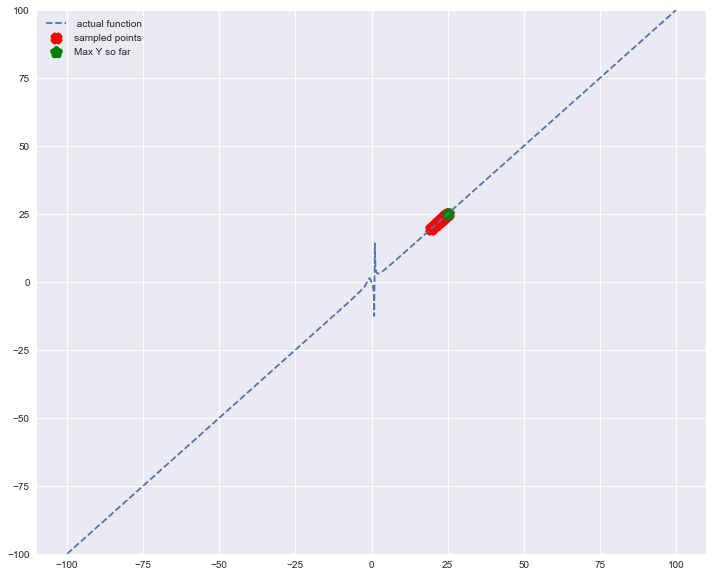

1.4764741078e-10 m v 10.0 point [ 12.15075377]
1.64003595829e-05 m v 9.99999999948 point [ 14.01507538]
0.0450628993934 m v 9.99726114243 point [ 15.87939698]
2.70370199554 m v 6.01860637838 point [ 17.74371859]
6.82342992369 m v 2.08626647571 point [ 19.6080402]
8.68453121293 m v 2.08519859386 point [ 21.47236181]
10.547466526 m v 2.08512320021 point [ 23.33668342]
12.3969330878 m v 2.08121896713 point [ 25.20100503]
5.07339115664 m v 7.30150991942 point [ 27.06532663]
0.0603004709026 m v 9.99915985436 point [ 28.92964824]
1.57730227954e-05 m v 9.99999999991 point [ 30.79396985]
1.05659336636e-10 m v 10.0 point [ 32.65829146]
1.97278039547e-17 m v 10.0 point [ 34.52261307]
1.0706718777e-25 m v 10.0 point [ 36.38693467]
1.72674923595e-35 m v 10.0 point [ 38.25125628]
8.38005230525e-47 m v 10.0 point [ 40.11557789]
1.23320887348e-59 m v 10.0 point [ 41.9798995]
5.53044195999e-74 m v 10.0 point [ 43.84422111]
7.58389168443e-90 m v 10.0 point [ 45.70854271]
3.18774668656e-107 m v 10.0 poi

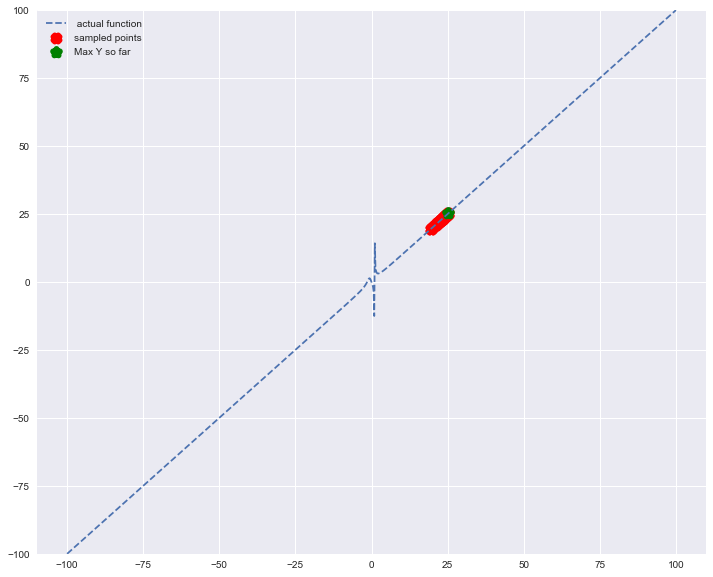

4.20904241607e-05 m v 9.99999999653 point [ 14.20100503]
0.0831668349331 m v 9.99097733735 point [ 16.08040201]
3.3576812108 m v 4.62044969808 point [ 17.95979899]
6.94792844823 m v 2.06648973774 point [ 19.83919598]
8.82526232228 m v 2.06621572679 point [ 21.71859296]
10.7025243638 m v 2.06591479549 point [ 23.59798995]
12.4887006986 m v 2.04443553428 point [ 25.47738693]
3.82250436392 m v 8.30544989576 point [ 27.35678392]
0.0271266514474 m v 9.99983539699 point [ 29.2361809]
3.93154226018e-06 m v 10.0 point [ 31.11557789]
1.37437007795e-11 m v 10.0 point [ 32.99497487]
1.26474957249e-18 m v 10.0 point [ 34.87437186]
3.1990720193e-27 m v 10.0 point [ 36.75376884]
2.27518604875e-37 m v 10.0 point [ 38.63316583]
4.60849371429e-49 m v 10.0 point [ 40.51256281]
2.67935298788e-62 m v 10.0 point [ 42.3919598]
4.49368587698e-77 m v 10.0 point [ 44.27135678]
2.18144298996e-93 m v 10.0 point [ 46.15075377]
3.07243400259e-111 m v 10.0 point [ 48.03015075]
1.25766206364e-130 m v 10.0 point [ 49

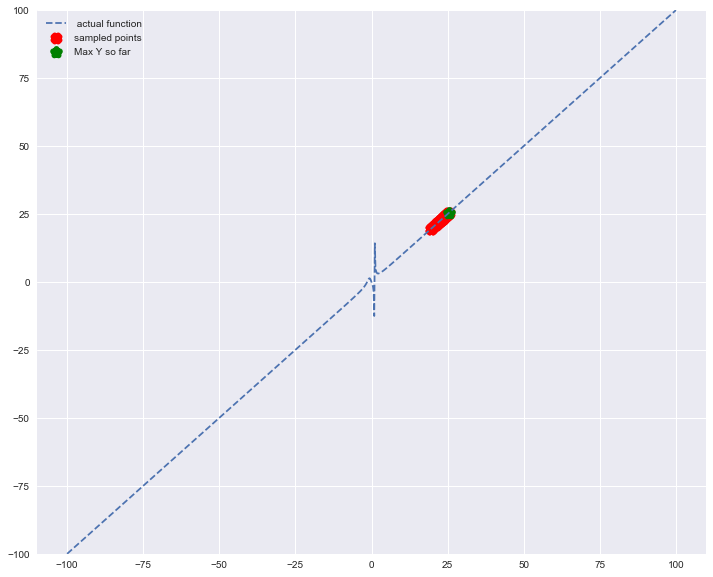

1.32060246849e-09 m v 10.0 point [ 12.47738693]
0.000100157606019 m v 9.99999997758 point [ 14.3919598]
0.150218231466 m v 9.96920169419 point [ 16.30653266]
4.02465591857 m v 3.18646049699 point [ 18.22110553]
7.02222151487 m v 2.0304666334 point [ 20.13567839]
8.93608307185 m v 2.03092821464 point [ 22.05025126]
10.8485670049 m v 2.03074448502 point [ 23.96482412]
12.4928186625 m v 1.97882412853 point [ 25.87939698]
2.53827742015 m v 9.1647047118 point [ 27.79396985]
0.00950535793125 m v 9.99997802029 point [ 29.70854271]
6.62471768037e-07 m v 10.0 point [ 31.62311558]
1.0049119379e-12 m v 10.0 point [ 33.53768844]
3.58275405213e-20 m v 10.0 point [ 35.45226131]
3.11749158465e-29 m v 10.0 point [ 37.36683417]
6.75366720863e-40 m v 10.0 point [ 39.28140704]
3.6835936646e-52 m v 10.0 point [ 41.1959799]
5.09131832008e-66 m v 10.0 point [ 43.11055276]
1.79019242683e-81 m v 10.0 point [ 45.02512563]
1.60506656676e-98 m v 10.0 point [ 46.93969849]
3.67469522136e-117 m v 10.0 point [ 48.85

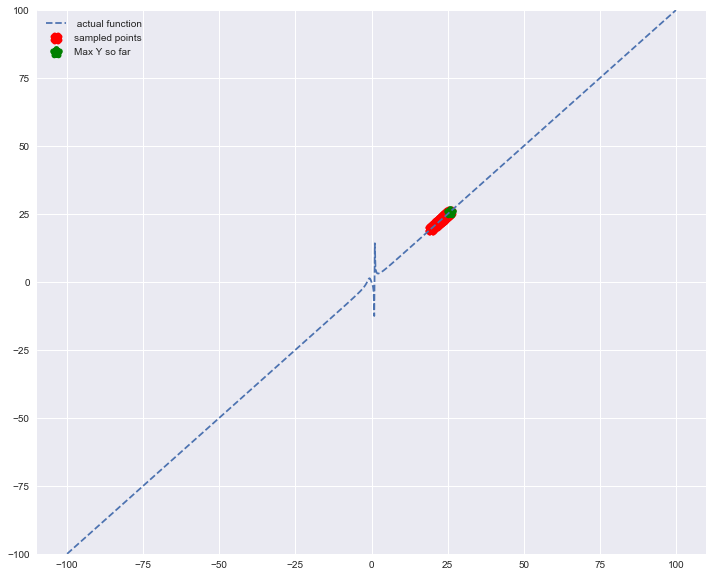

0.000802507187694 m v 9.99999818485 point [ 14.87939698]
0.462691531679 m v 9.69758103319 point [ 16.80904523]
4.93464472576 m v 1.95825159024 point [ 18.73869347]
7.14172635148 m v 1.96990368912 point [ 20.66834171]
9.07004526127 m v 1.96970054442 point [ 22.59798995]
11.0002147415 m v 1.97018038018 point [ 24.52763819]
12.2720582325 m v 1.90180227632 point [ 26.45728643]
1.66064631836 m v 9.61033108757 point [ 28.38693467]
0.00359904065035 m v 9.99999704951 point [ 30.31658291]
1.39166198539e-07 m v 10.0 point [ 32.24623116]
1.12825590139e-13 m v 10.0 point [ 34.1758794]
2.06931829135e-21 m v 10.0 point [ 36.10552764]
8.89064784689e-31 m v 10.0 point [ 38.03517588]
9.09414300286e-42 m v 10.0 point [ 39.96482412]
2.23152852166e-54 m v 10.0 point [ 41.89447236]
1.3182364379e-68 m v 10.0 point [ 43.8241206]
1.8778075709e-84 m v 10.0 point [ 45.75376884]
6.45518384e-102 m v 10.0 point [ 47.68341709]
5.35698024353e-121 m v 10.0 point [ 49.61306533]
1.07338768753e-141 m v 10.0 point [ 51.5

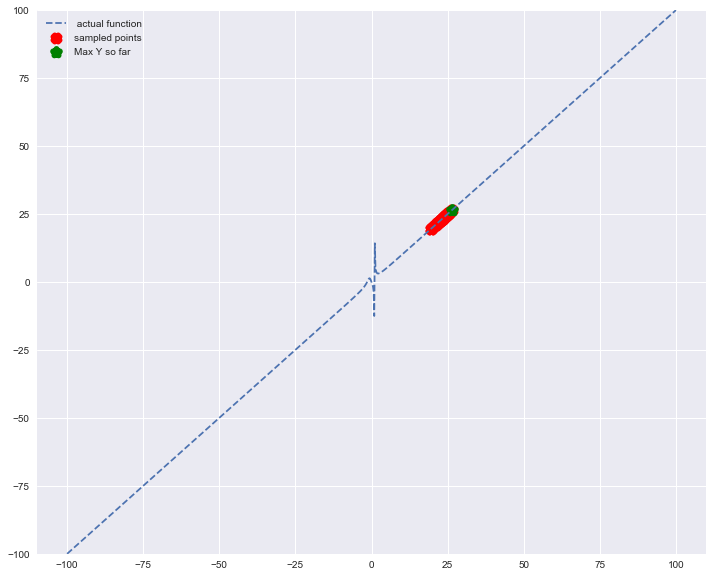

9.72696196747e-10 m v 10.0 point [ 12.45728643]
9.91851778117e-05 m v 9.99999996857 point [ 14.42713568]
0.157935822986 m v 9.95118357855 point [ 16.39698492]
3.6832367359 m v 2.54341106281 point [ 18.36683417]
6.29739919804 m v 1.89608574975 point [ 20.33668342]
8.26536422055 m v 1.89586189011 point [ 22.30653266]
10.2341378491 m v 1.89595250658 point [ 24.27638191]
12.2285911319 m v 1.90323563934 point [ 26.24623116]
5.05108736402 m v 7.3199042713 point [ 28.2160804]
0.0394774762888 m v 9.99969683964 point [ 30.18592965]
4.54271406461e-06 m v 10.0 point [ 32.15577889]
9.390724348e-12 m v 10.0 point [ 34.12562814]
3.81129055652e-19 m v 10.0 point [ 36.09547739]
3.13873842338e-28 m v 10.0 point [ 38.06532663]
5.30574683684e-39 m v 10.0 point [ 40.03517588]
1.84810338616e-51 m v 10.0 point [ 42.00502513]
1.32814762357e-65 m v 10.0 point [ 43.97487437]
1.97008919734e-81 m v 10.0 point [ 45.94472362]
6.03257342109e-99 m v 10.0 point [ 47.91457286]
3.81342385452e-118 m v 10.0 point [ 49.88

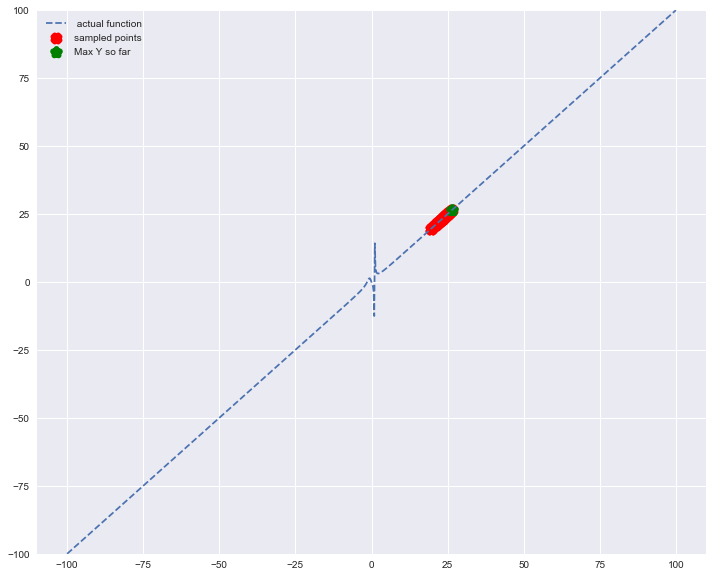

In [245]:


for i in range(samples):
    fig = plt.figure(figsize=(12,10))
    x_sampled_points, y_sampled_points, sampled_var, best_x, best_y = next(gen)
    plt.plot(train_y_x_axis,train_y_numbers_, label=' actual function',linestyle="--")
    print(f"Point on x-axis just sampled ={x_sampled_points[-1]}")
    plt.scatter(x_sampled_points,y_sampled_points, color='red',marker='X',label='sampled points',linewidths=5)
    plt.scatter(best_x,best_y, marker = "*",label='Max Y so far',linewidths=6, color = 'green')
    #plt.gca().fill_between( np.array(x_sampled_points).flat, np.array(x_sampled_points)-2*np.sqrt(sampled_var),
    #                       np.array(x_sampled_points)+2*np.sqrt(sampled_var), color="#dddddd",label='95% confidence')
    
    # Sizes for the axis
    train_y_x_axis = np.array(np.linspace(-100,100,1000))
    train_y_numbers_ = [train_y_func(i) for i  in train_y_x_axis]
    
    

    plt.legend()
    plt.ylim(-100,100)
    plt.show();
    
    # pause so we can see the graph
    #time.sleep(1);


In [201]:
best_y = train_y_func(10)

In [2388]:
best_y

-0.027201055544468493

In [2389]:
np.array([_ for _ in range(-10,10)]) - best_y

array([-9.97279894, -8.97279894, -7.97279894, -6.97279894, -5.97279894,
       -4.97279894, -3.97279894, -2.97279894, -1.97279894, -0.97279894,
        0.02720106,  1.02720106,  2.02720106,  3.02720106,  4.02720106,
        5.02720106,  6.02720106,  7.02720106,  8.02720106,  9.02720106])

In [1707]:
expected_improvement(np.array([_ for _ in range(1500,2000)]), var_y_pred_diag[0], best_y  ,distribution) # new x-value

array([[ 750.34955314,  750.84955329,  751.34955344,  751.84955359,
         752.34955374,  752.84955389,  753.34955404,  753.84955418,
         754.34955433,  754.84955448,  755.34955463,  755.84955478,
         756.34955493,  756.84955508,  757.34955523,  757.84955538,
         758.34955553,  758.84955568,  759.34955583,  759.84955598,
         760.34955613,  760.84955628,  761.34955643,  761.84955658,
         762.34955673,  762.84955688,  763.34955703,  763.84955718,
         764.34955733,  764.84955748,  765.34955763,  765.84955778,
         766.34955794,  766.84955809,  767.34955824,  767.84955839,
         768.34955854,  768.84955869,  769.34955884,  769.849559  ,
         770.34955915,  770.8495593 ,  771.34955945,  771.8495596 ,
         772.34955976,  772.84955991,  773.34956006,  773.84956021,
         774.34956037,  774.84956052,  775.34956067,  775.84956083,
         776.34956098,  776.84956113,  777.34956129,  777.84956144,
         778.34956159,  778.84956175,  779.34956

In [1587]:
# test the y for the current expected improvements
if train_y_func(79.00479131) > best_y:
    best_y = train_y_func(79.00479131)
else:
    pass

In [1589]:
best_y # we found a better pint

1287.601446747913

In [1595]:
mu, sigma_squarred = test_gaussian_process(array([[ 79.00479131]]), train_x, train_y_numbers) # test this new point

In [1596]:
new_dist = stats.norm(mu,np.sqrt(sigma_squarred))

In [1597]:
distribution_new = stats.norm(mu, sigma ) # new distribution

In [1598]:
expected_improvement(mu, sigma, best_y, distribution_new )

array([ 46946.71930156])

In [1599]:
# sample another point

In [1602]:
# test the y for the current expected improvements
if train_y_func(46946.71930156) > best_y:
    best_y = train_y_func(46946.71930156)
else:
    pass

In [1604]:
best_y # we found a better point

1074068611.2654407

In [1605]:
mu, sigma_squarred = test_gaussian_process(array([[ 1074068611.2654407]]), train_x, train_y_numbers) # test this new point

In [1606]:
new_dist = stats.norm(mu,np.sqrt(sigma_squarred))

In [1607]:
distribution_new = stats.norm(mu, sigma ) # new distribution

In [1608]:
expected_improvement(mu, sigma, best_y, distribution_new )

array([ -5.36981876e+08])